Title: YouTube Videos Statistic Analysis

Author: Muduo Wang

First Creation: December 17, 2020
 
1st Edition: April 17, 2020

- Change Log:
  - Edited the project in order to show clearly the purposes of the steps of the data.
  - Deleted insignificant and repetitive analysis, including scatter plot of the categories and view.

Description: The analysis include histograms, descriptive statistics, and correlational analysis of 5 variables:<br>
<ol>
<li>- Time to Trend for the videos</li>
<li>- Categories of the videos</li>
<li>- Total Views that the videos receive</li>
<li>- Total Comments that the videso receive</li>
<li>- Total Likes that the videos receive</li>
</ol>

In [273]:
# Loading Packages

import matplotlib.pyplot as plt
import numpy as np
import scipy

from collections import Counter

import thinkstats2
import thinkplot
import pandas as pd
import json

This first section explores the categories of the trending videos.

In [274]:
#I mporting data

df = pd.DataFrame(
    pd.read_csv('~/Downloads/ThinkStats2-master/Youtube_Video_Analysis/USvideos.csv')
)

In [275]:
# Importing JSON file for categories.

category = pd.read_json("~/Downloads/ThinkStats2-master/Youtube_Video_Analysis/US_category_id.json")

In [276]:
# Getting "items" from the file. Making it into a series of dictionaries.

items = category["items"]

ser = pd.Series(items)

In [277]:
# Using a list to append all the titles.

a=0
categories = []

for i in ser:
    categories.append(ser[a]['snippet']['title'])
    a +=1

print (categories)

['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 'Sports', 'Short Movies', 'Travel & Events', 'Gaming', 'Videoblogging', 'People & Blogs', 'Comedy', 'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 'Science & Technology', 'Nonprofits & Activism', 'Movies', 'Anime/Animation', 'Action/Adventure', 'Classics', 'Comedy', 'Documentary', 'Drama', 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Shows', 'Trailers']


In [278]:
# Putting titles into order.

n = 1
categories_dict = {}

for i in categories:
    categories_dict[n]=categories[n-1]
    n += 1
    
print (categories_dict)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 3: 'Music', 4: 'Pets & Animals', 5: 'Sports', 6: 'Short Movies', 7: 'Travel & Events', 8: 'Gaming', 9: 'Videoblogging', 10: 'People & Blogs', 11: 'Comedy', 12: 'Entertainment', 13: 'News & Politics', 14: 'Howto & Style', 15: 'Education', 16: 'Science & Technology', 17: 'Nonprofits & Activism', 18: 'Movies', 19: 'Anime/Animation', 20: 'Action/Adventure', 21: 'Classics', 22: 'Comedy', 23: 'Documentary', 24: 'Drama', 25: 'Family', 26: 'Foreign', 27: 'Horror', 28: 'Sci-Fi/Fantasy', 29: 'Thriller', 30: 'Shorts', 31: 'Shows', 32: 'Trailers'}


In [279]:
# There is an error in the data, where the JSON file does not contain the categorical value for "43". The observations with "43" as the category also do not have a consistent pattern to work with.

df = df[df.category_id != 43]

In [280]:
# Replacing the data with new categorical names

category_ids = list(df.category_id)
df.category_id = df.category_id.replace(to_replace=categories_dict)

Hist({'Drama': 9964, 'People & Blogs': 6472, 'Foreign': 4146, 'Documentary': 3457, 'Comedy': 3210, 'Family': 2487, 'Sci-Fi/Fantasy': 2401, 'Film & Animation': 2345, 'Nonprofits & Activism': 2174, 'Horror': 1656, 'Education': 920, 'Action/Adventure': 817, 'Anime/Animation': 402, 'Autos & Vehicles': 384, 'Thriller': 57})


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0.5, 0, 'Action/Adventure'),
  Text(1.5, 0, 'Anime/Animation'),
  Text(2.5, 0, 'Autos & Vehicles'),
  Text(3.5, 0, 'Comedy'),
  Text(4.5, 0, 'Documentary'),
  Text(5.5, 0, 'Drama'),
  Text(6.5, 0, 'Education'),
  Text(7.5, 0, 'Family'),
  Text(8.5, 0, 'Film & Animation'),
  Text(9.5, 0, 'Foreign'),
  Text(10.5, 0, 'Horror'),
  Text(11.5, 0, 'Nonprofits & Activism'),
  Text(12.5, 0, 'People & Blogs'),
  Text(13.5, 0, 'Sci-Fi/Fantasy'),
  Text(14.5, 0, 'Thriller')])

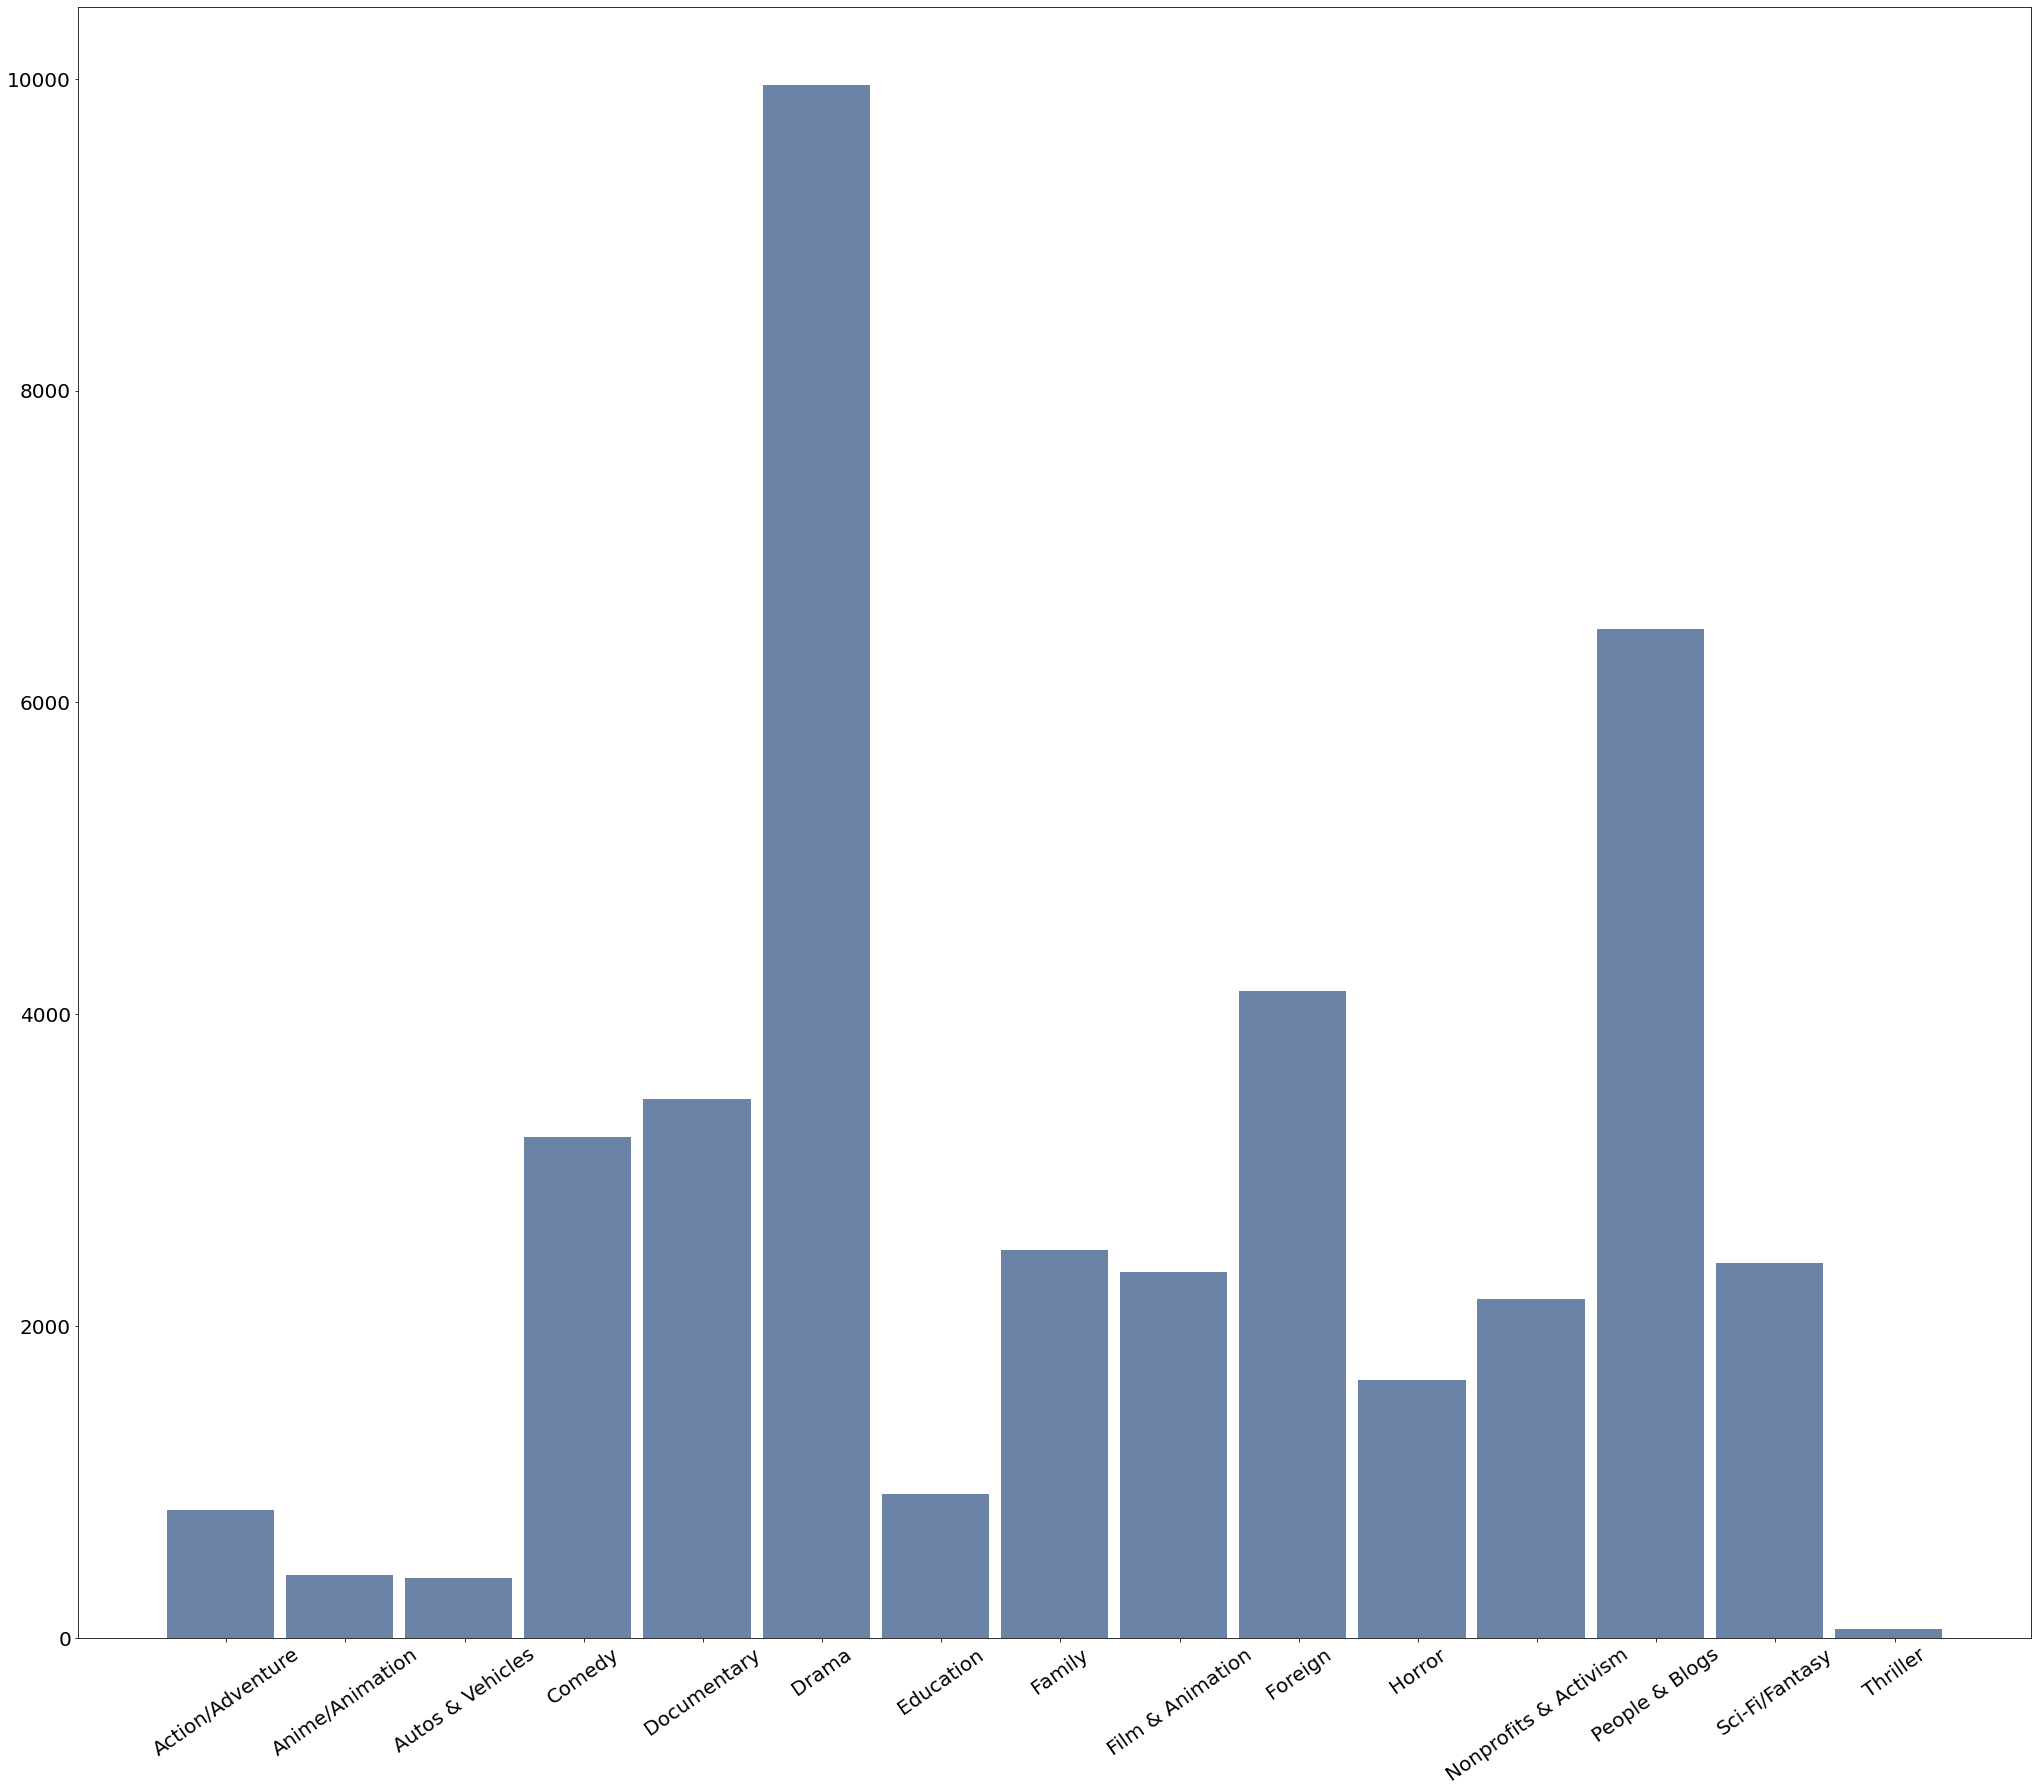

In [281]:
# Taking bar plot from categories.

cat_hist=thinkstats2.Hist(df.category_id)
print(cat_hist)

thinkplot.hist(cat_hist, align="left")


# Adjust the plot to see all the titles.

from pylab import rcParams

rcParams['figure.figsize'] = 35, 30
rcParams.update({'font.size': 20})
plt.xticks(rotation =35)

And thus, the data is cleaned, and the frequency chart of video categories have been plotted.

**********************************************************************************************************************

The next variable is "Time to Fame," which shows the time it takes for videos to trend.

In [282]:
# Parsing "Trending Date", "Publish Date", and getting the differece between them.

import datetime
from dateutil import parser

trend_date = []

for d1 in df.trending_date:
    trend_date.append(datetime.datetime.strptime(d1, '%y.%d.%m'))
    
pub_date = []


for d2 in df.publish_time:  
    pub_date.append(parser.parse(d2).replace(tzinfo=None))

t_diff=[]
    
for t1, t2 in zip(pub_date, trend_date):
    t_diff.append(t2-t1)

In [283]:
hours_diff=[]

for i in range(len(t_diff)):
    hours_diff.append(round((t_diff[i].total_seconds())/3600))


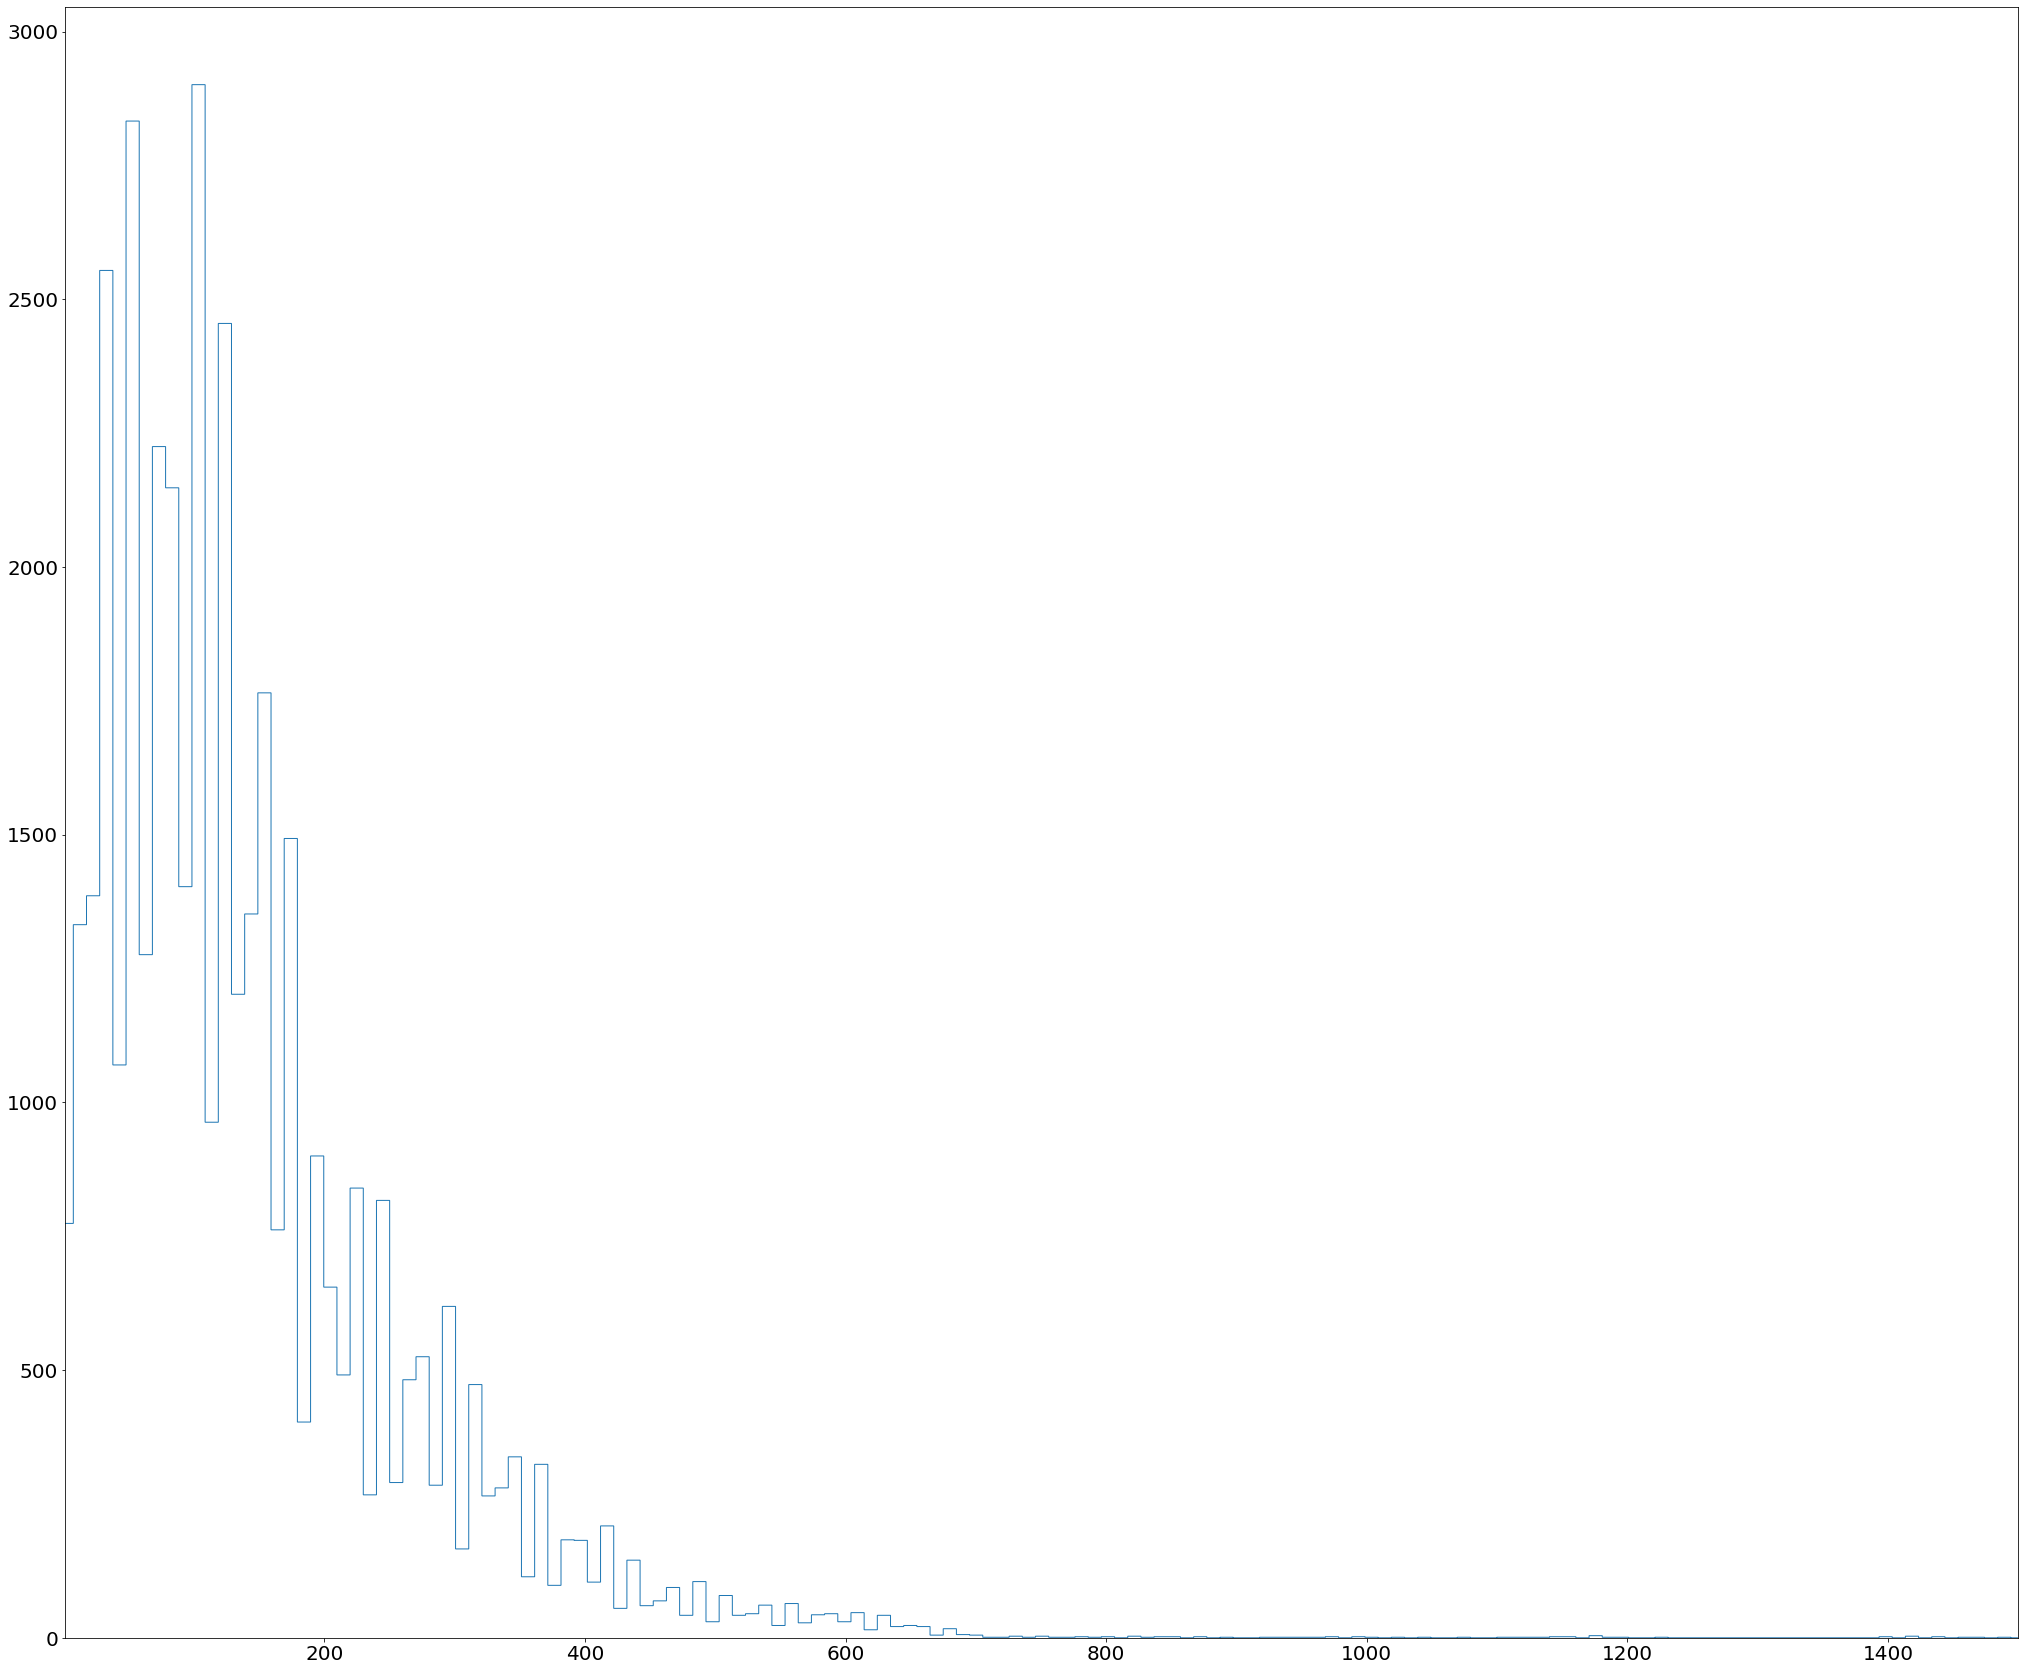

In [284]:
plot = plt.hist(hours_diff, bins = 10000, histtype='step')
plt.xlim(1, 1500)
plt.show()

In [285]:
# Descriptive Statsitcs

print("Mean: {}".format(np.mean(hours_diff)))
print("Standard Deviation: {}".format(np.std(hours_diff)))
print("Tails(Kurtosis): {}".format(scipy.stats.kurtosis(hours_diff)))
print("Mode: {}".format(scipy.stats.mode(hours_diff).mode))

Mean: 389.5672258632495
Standard Deviation: 3506.7064872064125
Tails(Kurtosis): 305.4095069516245
Mode: [80]


Below shows the distribution with the scales tranformed. X -> log(X);
This shows that the data relatively resemble a Gaussian curve after the adjustment. The bins are adjusted to better show the results.

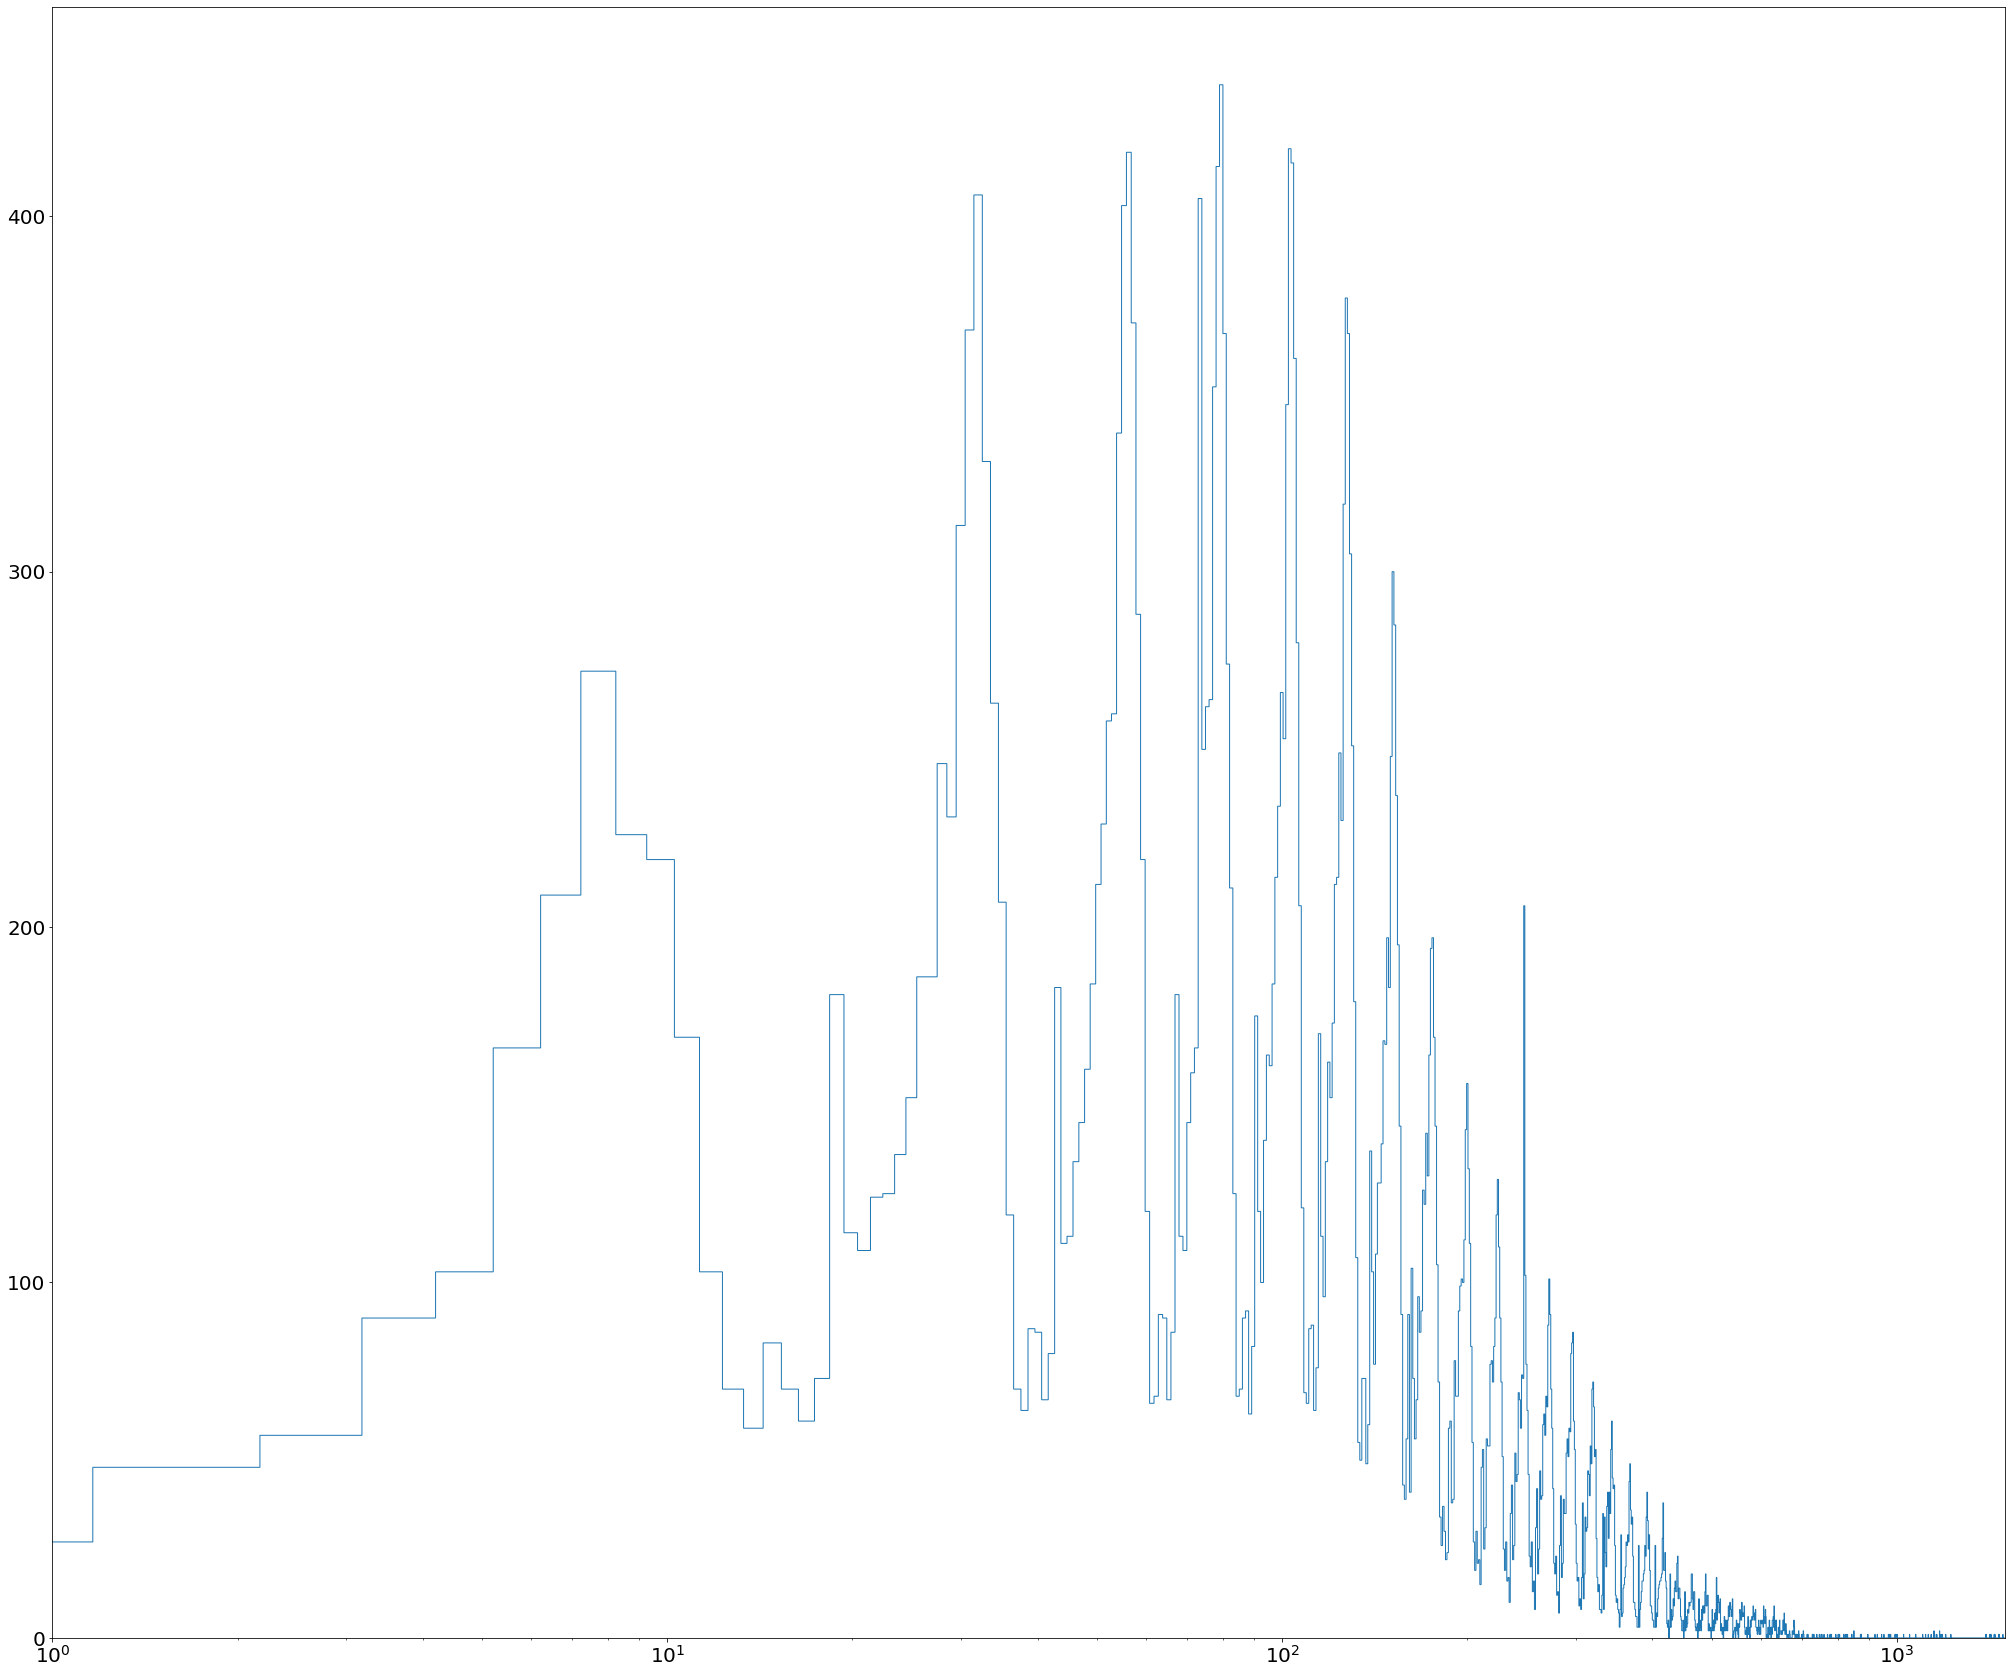

In [286]:
plot = plt.hist(hours_diff, bins = 100000, histtype='step')
plt.xlim(1, 1500)
plt.xscale('log')
plt.show()

**********************************************************************************************************************

The following section examines the next variable - views.

(0.0, 50000000.0)

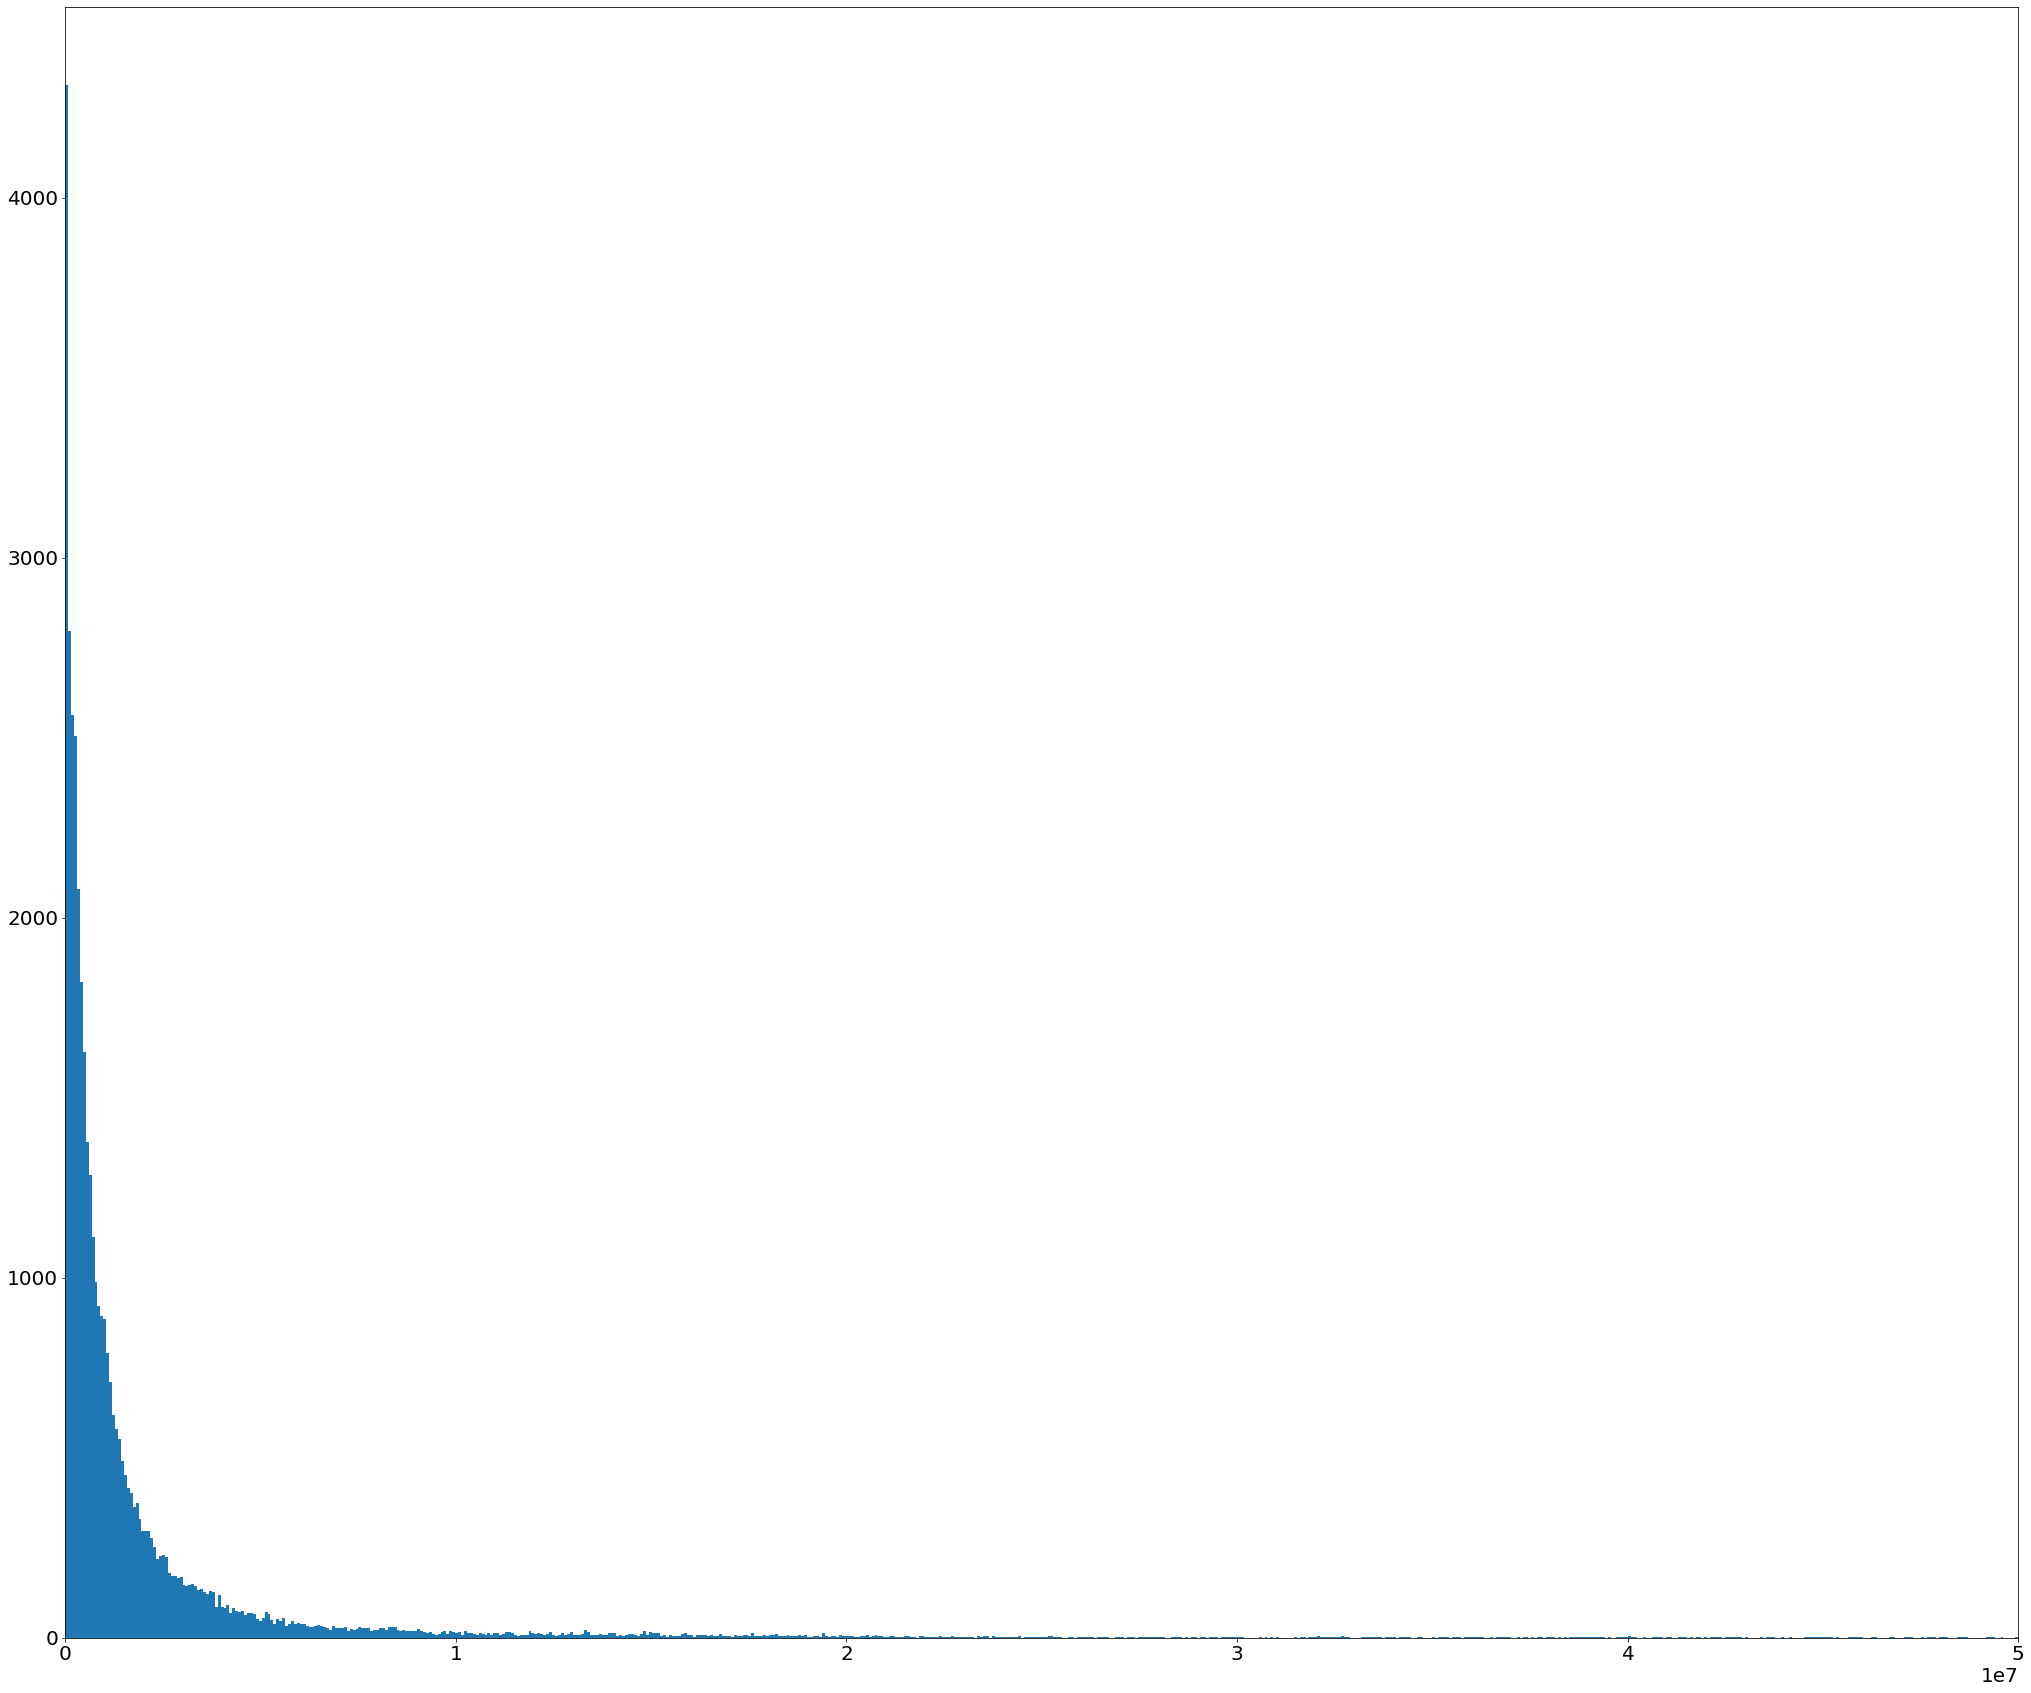

In [287]:
plt.hist(df.views, bins = 3000)
plt.xlim(0, 5e7)

In [288]:
# Descriptive Statsitcs

print("Mean: {}".format(np.mean(df.views)))
print("Standard Deviation: {}".format(np.std(df.views)))
print("Tails(Kurtosis): {}".format(scipy.stats.kurtosis(df.views)))
print("Mode: {}".format(scipy.stats.mode(df.views).mode))

Mean: 2362815.9320649514
Standard Deviation: 7398950.53837779
Tails(Kurtosis): 232.03921514428342
Mode: [2078]


**********************************************************************************************************************

The next variable - likes.

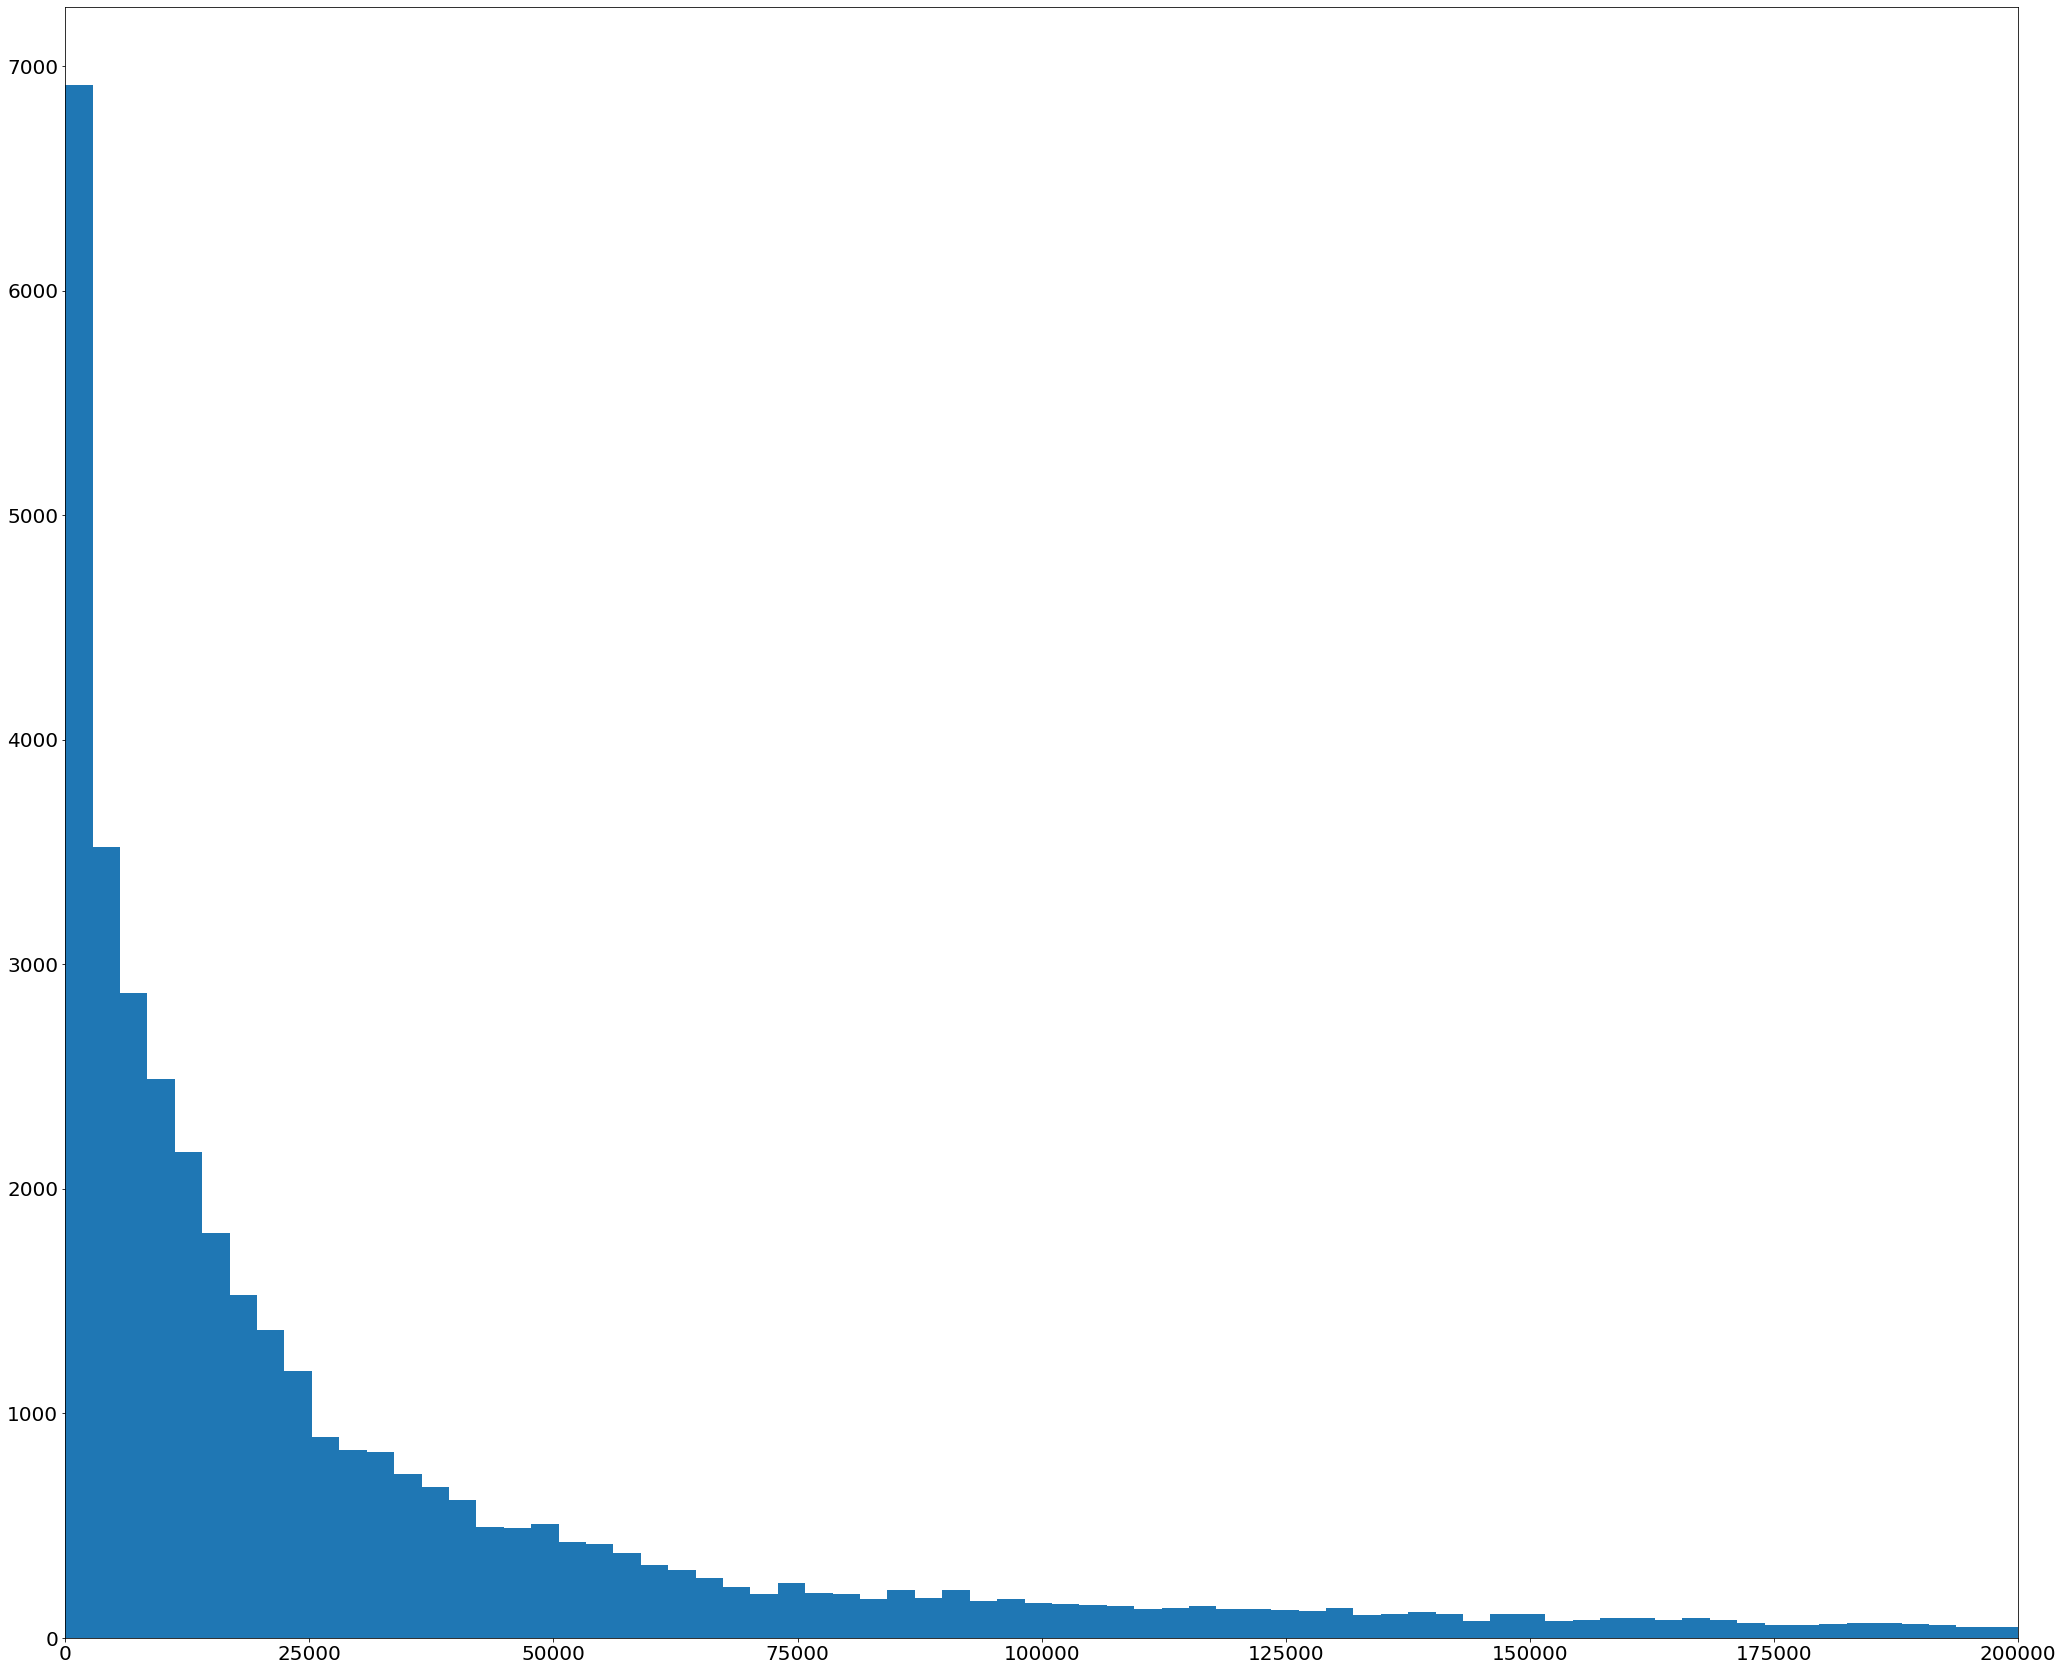

In [289]:
plt.hist(df.likes, bins=2000)
plt.xlim(0,2e5)
plt.show()

In [290]:
# Descriptive Statsitcs

print("Mean: {}".format(np.mean(df.likes)))
print("Standard Deviation: {}".format(np.std(df.likes)))
print("Tails(Kurtosis): {}".format(scipy.stats.kurtosis(df.likes)))
print("Mode: {}".format(scipy.stats.mode(df.likes).mode))

Mean: 74343.74838599237
Standard Deviation: 229032.3565260864
Tails(Kurtosis): 177.58926681808975
Mode: [0]


**********************************************************************************************************************

The final variable - comments.

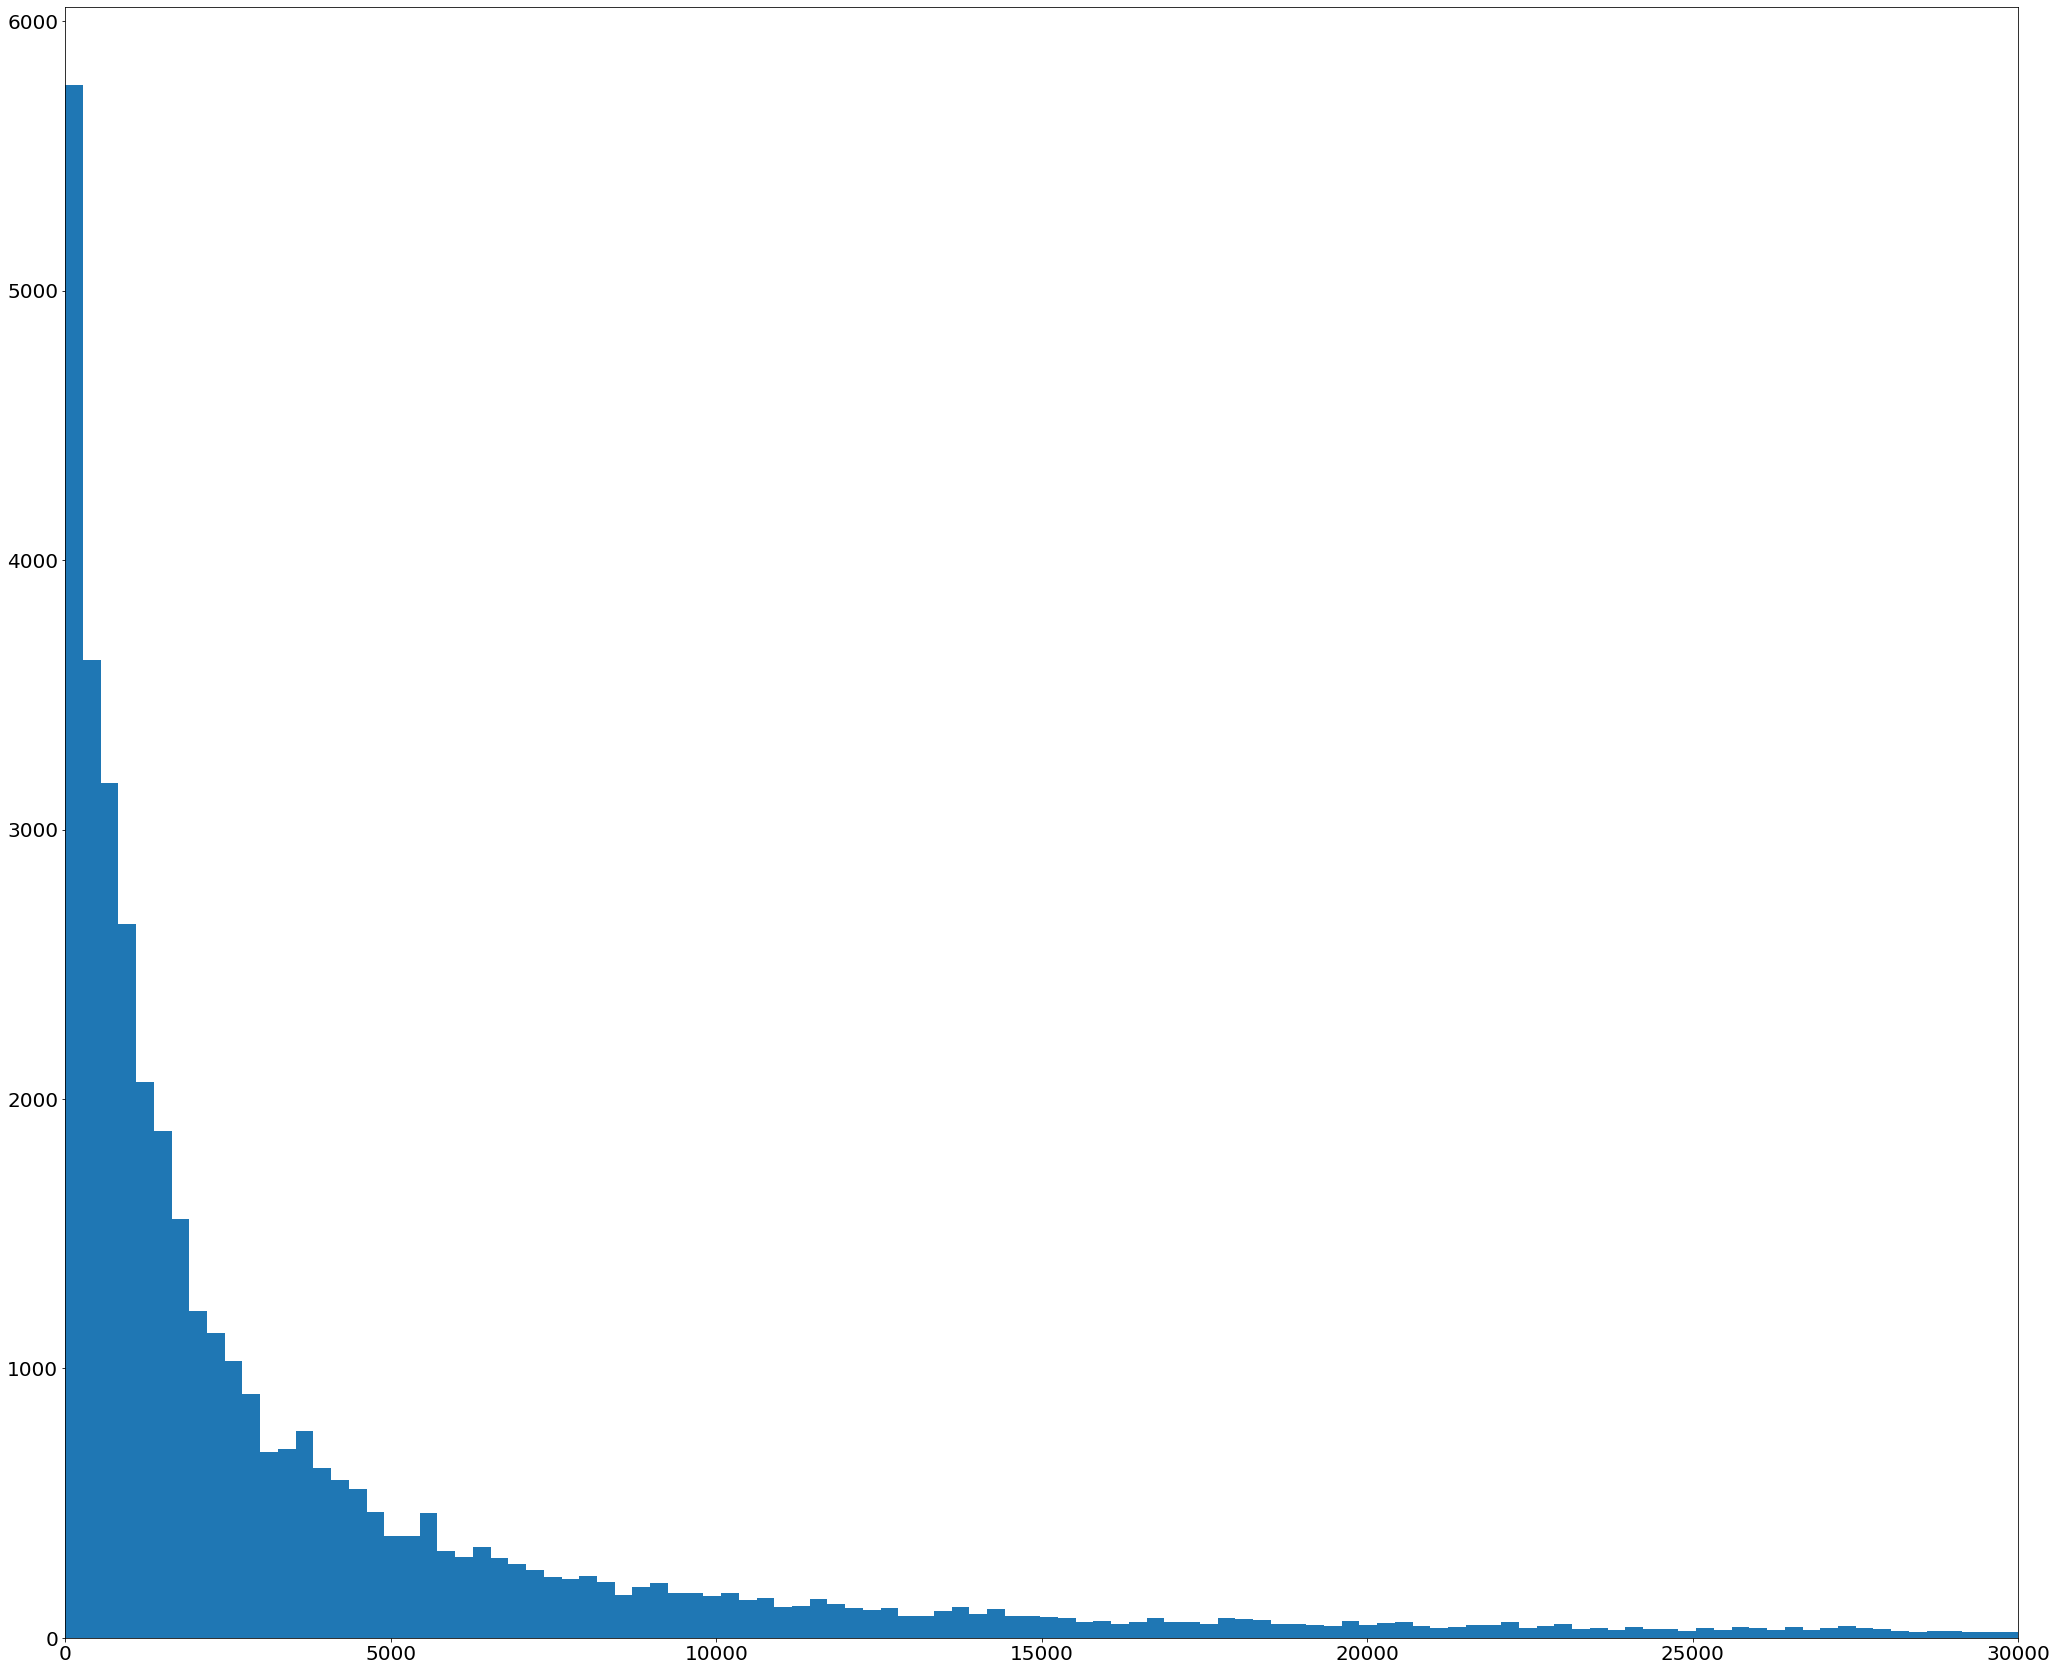

In [291]:
plt.hist(df.comment_count, bins=5000)
plt.xlim(0, 3e4)
plt.show()

In [292]:
# Descriptive Statsitcs

print("Mean: {}".format(np.mean(df.comment_count)))
print("Standard Deviation: {}".format(np.std(df.comment_count)))
print("Tails(Kurtosis): {}".format(scipy.stats.kurtosis(df.comment_count)))
print("Mode: {}".format(scipy.stats.mode(df.comment_count).mode))

Mean: 8456.251760735597
Standard Deviation: 37455.247412617086
Tails(Kurtosis): 531.363437652354
Mode: [0]


Section-conclusion: So then, all our histograms of values have been plotted. None of them follow a normal distribution, but four of the five of them closely resemble a pareto distribution, and one resemble a log-normal distribution("time to fame").

**********************************************************************************************************************

This section explores the data with two probability distribution functions: PMF and CDF.

PMFs (Probability Mass Functions)visualize how the mass of the distribution (Y: count) changes over the whole variable (X: variable).
Sidenote: in our specific data, thee PMFs are not very different from the histograms themselves.

Belows is a PMF for the views of Drama videos versus the views of Comedy videos.

In [293]:
drama_indice=[]

index = -1

for i in df.category_id:
    index += 1
    if i == "Drama":
        drama_indice.append(index)

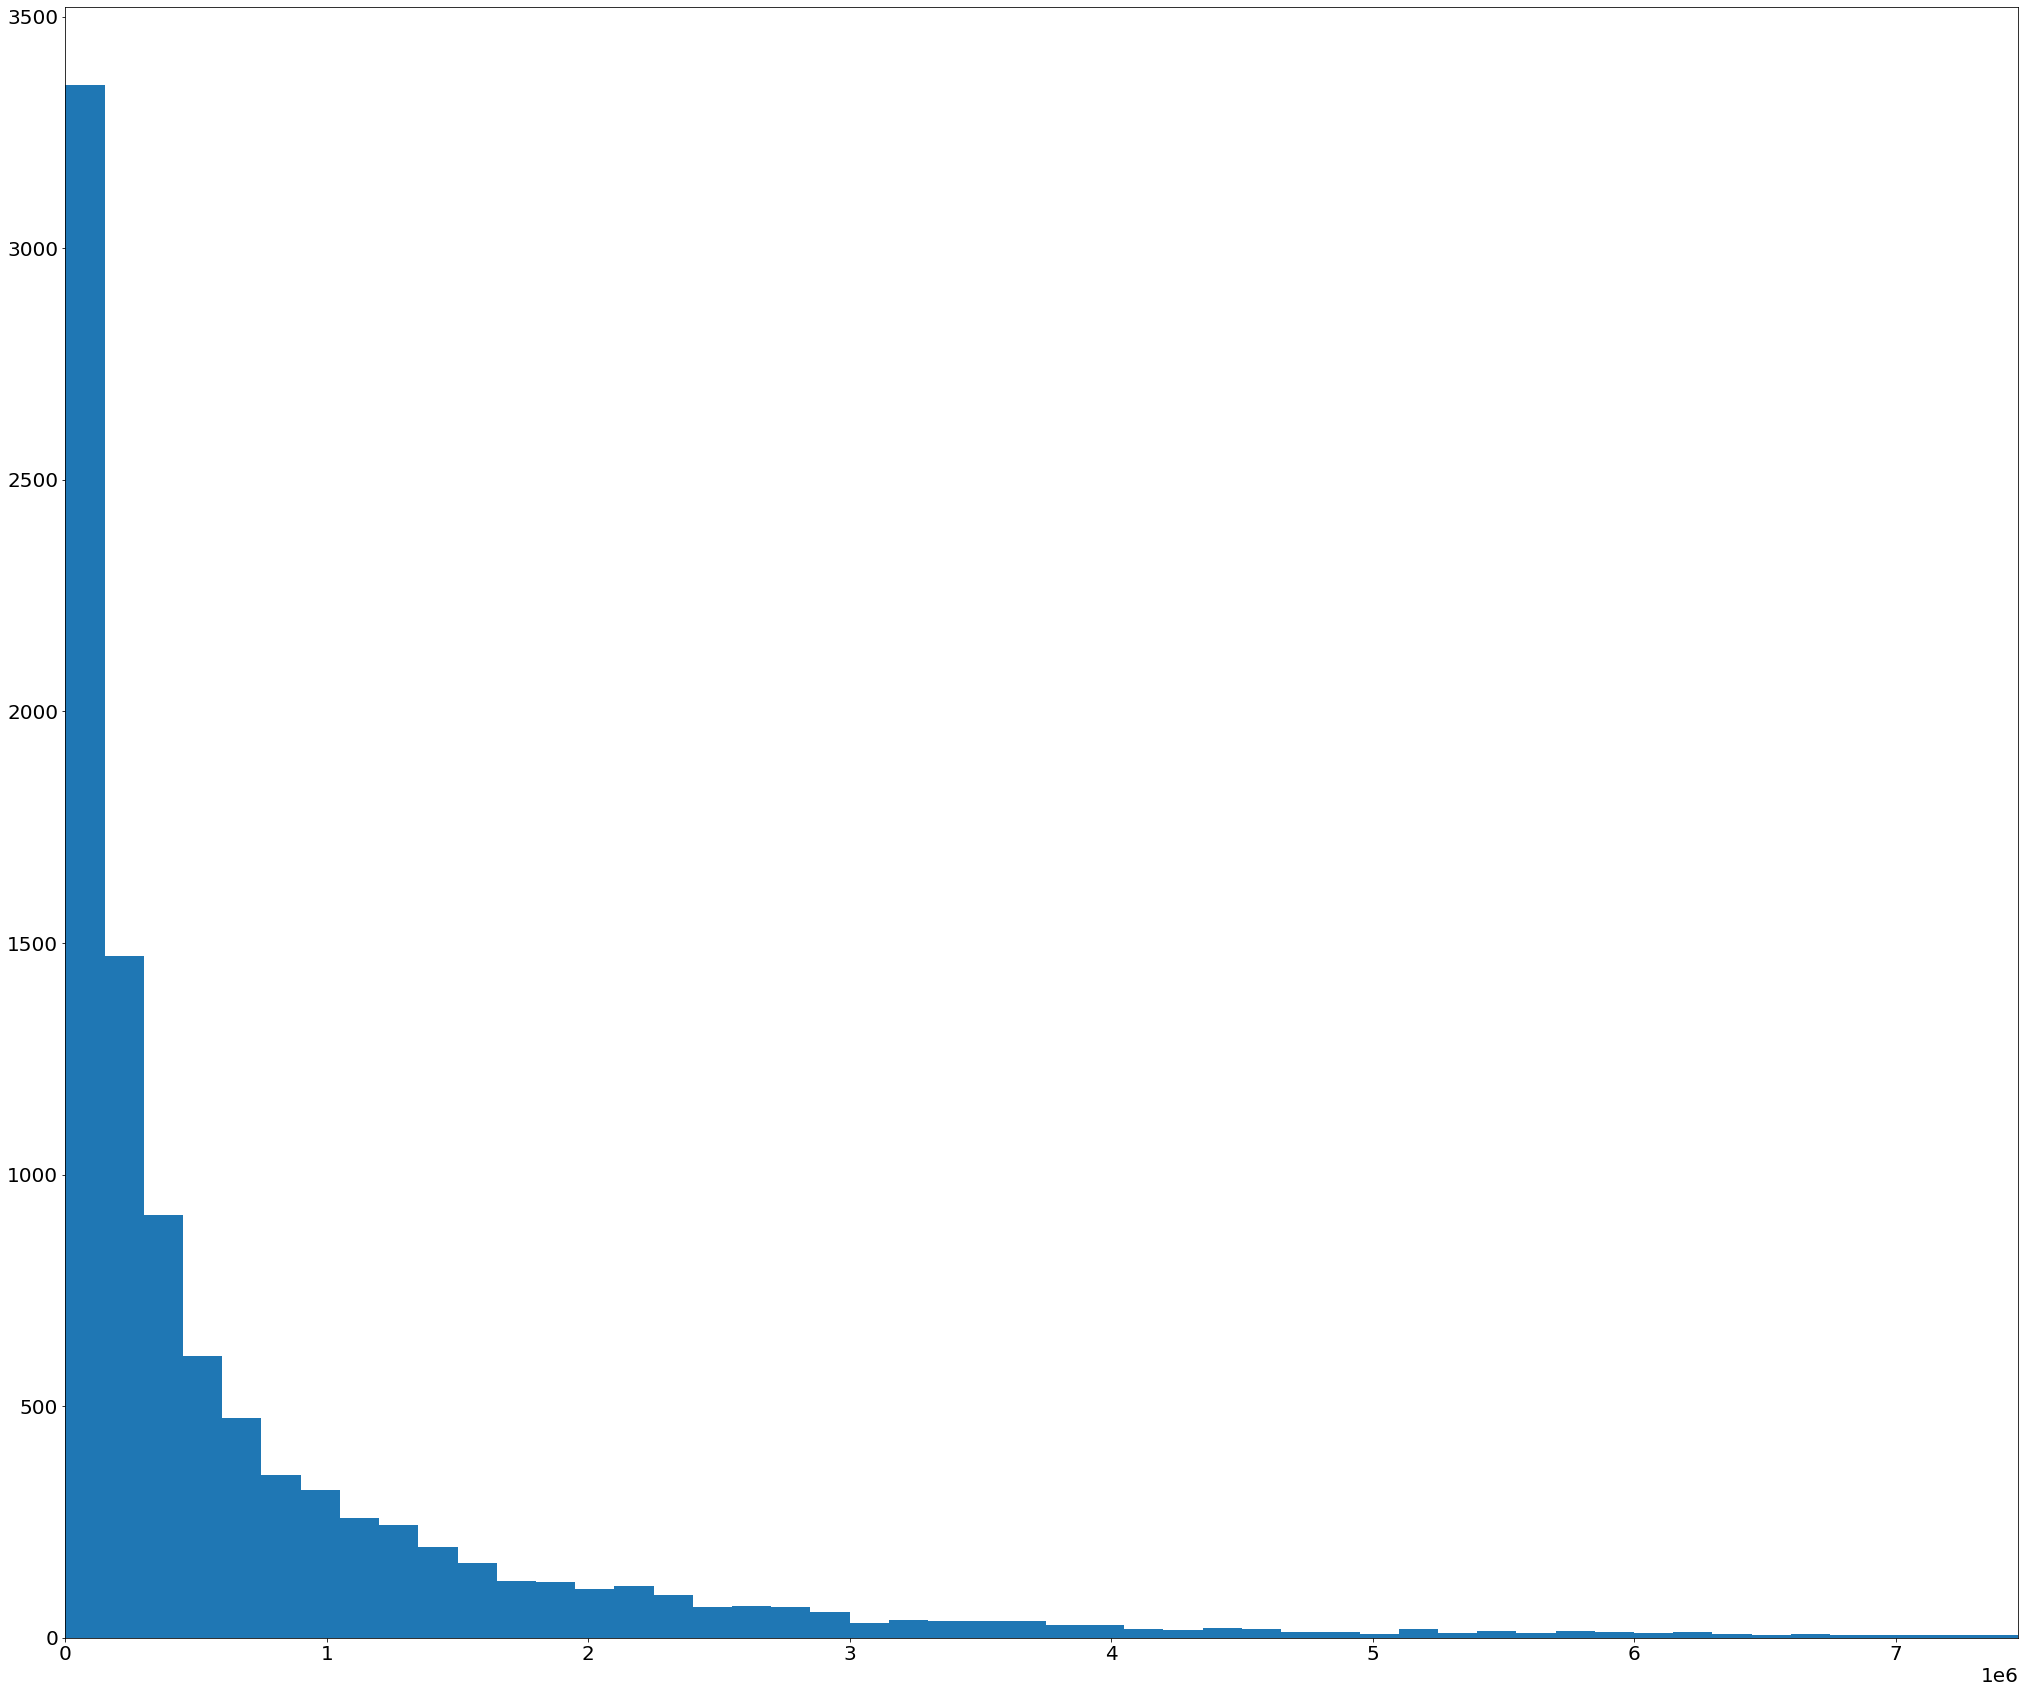

In [294]:
drama_views=[]

for i in range(len((drama_indice))):
    drama_views.append(df.views.iloc[i])
    
plt.hist(thinkstats2.Pmf(drama_views),bins=(int(len(drama_views)/10)))
plt.xlim(0,int(max(drama_views)/20))
plt.show()

In [295]:
comedy_indice=[]

index = -1

for i in df.category_id:
    index += 1
    if i == "Comedy":
        comedy_indice.append(index)

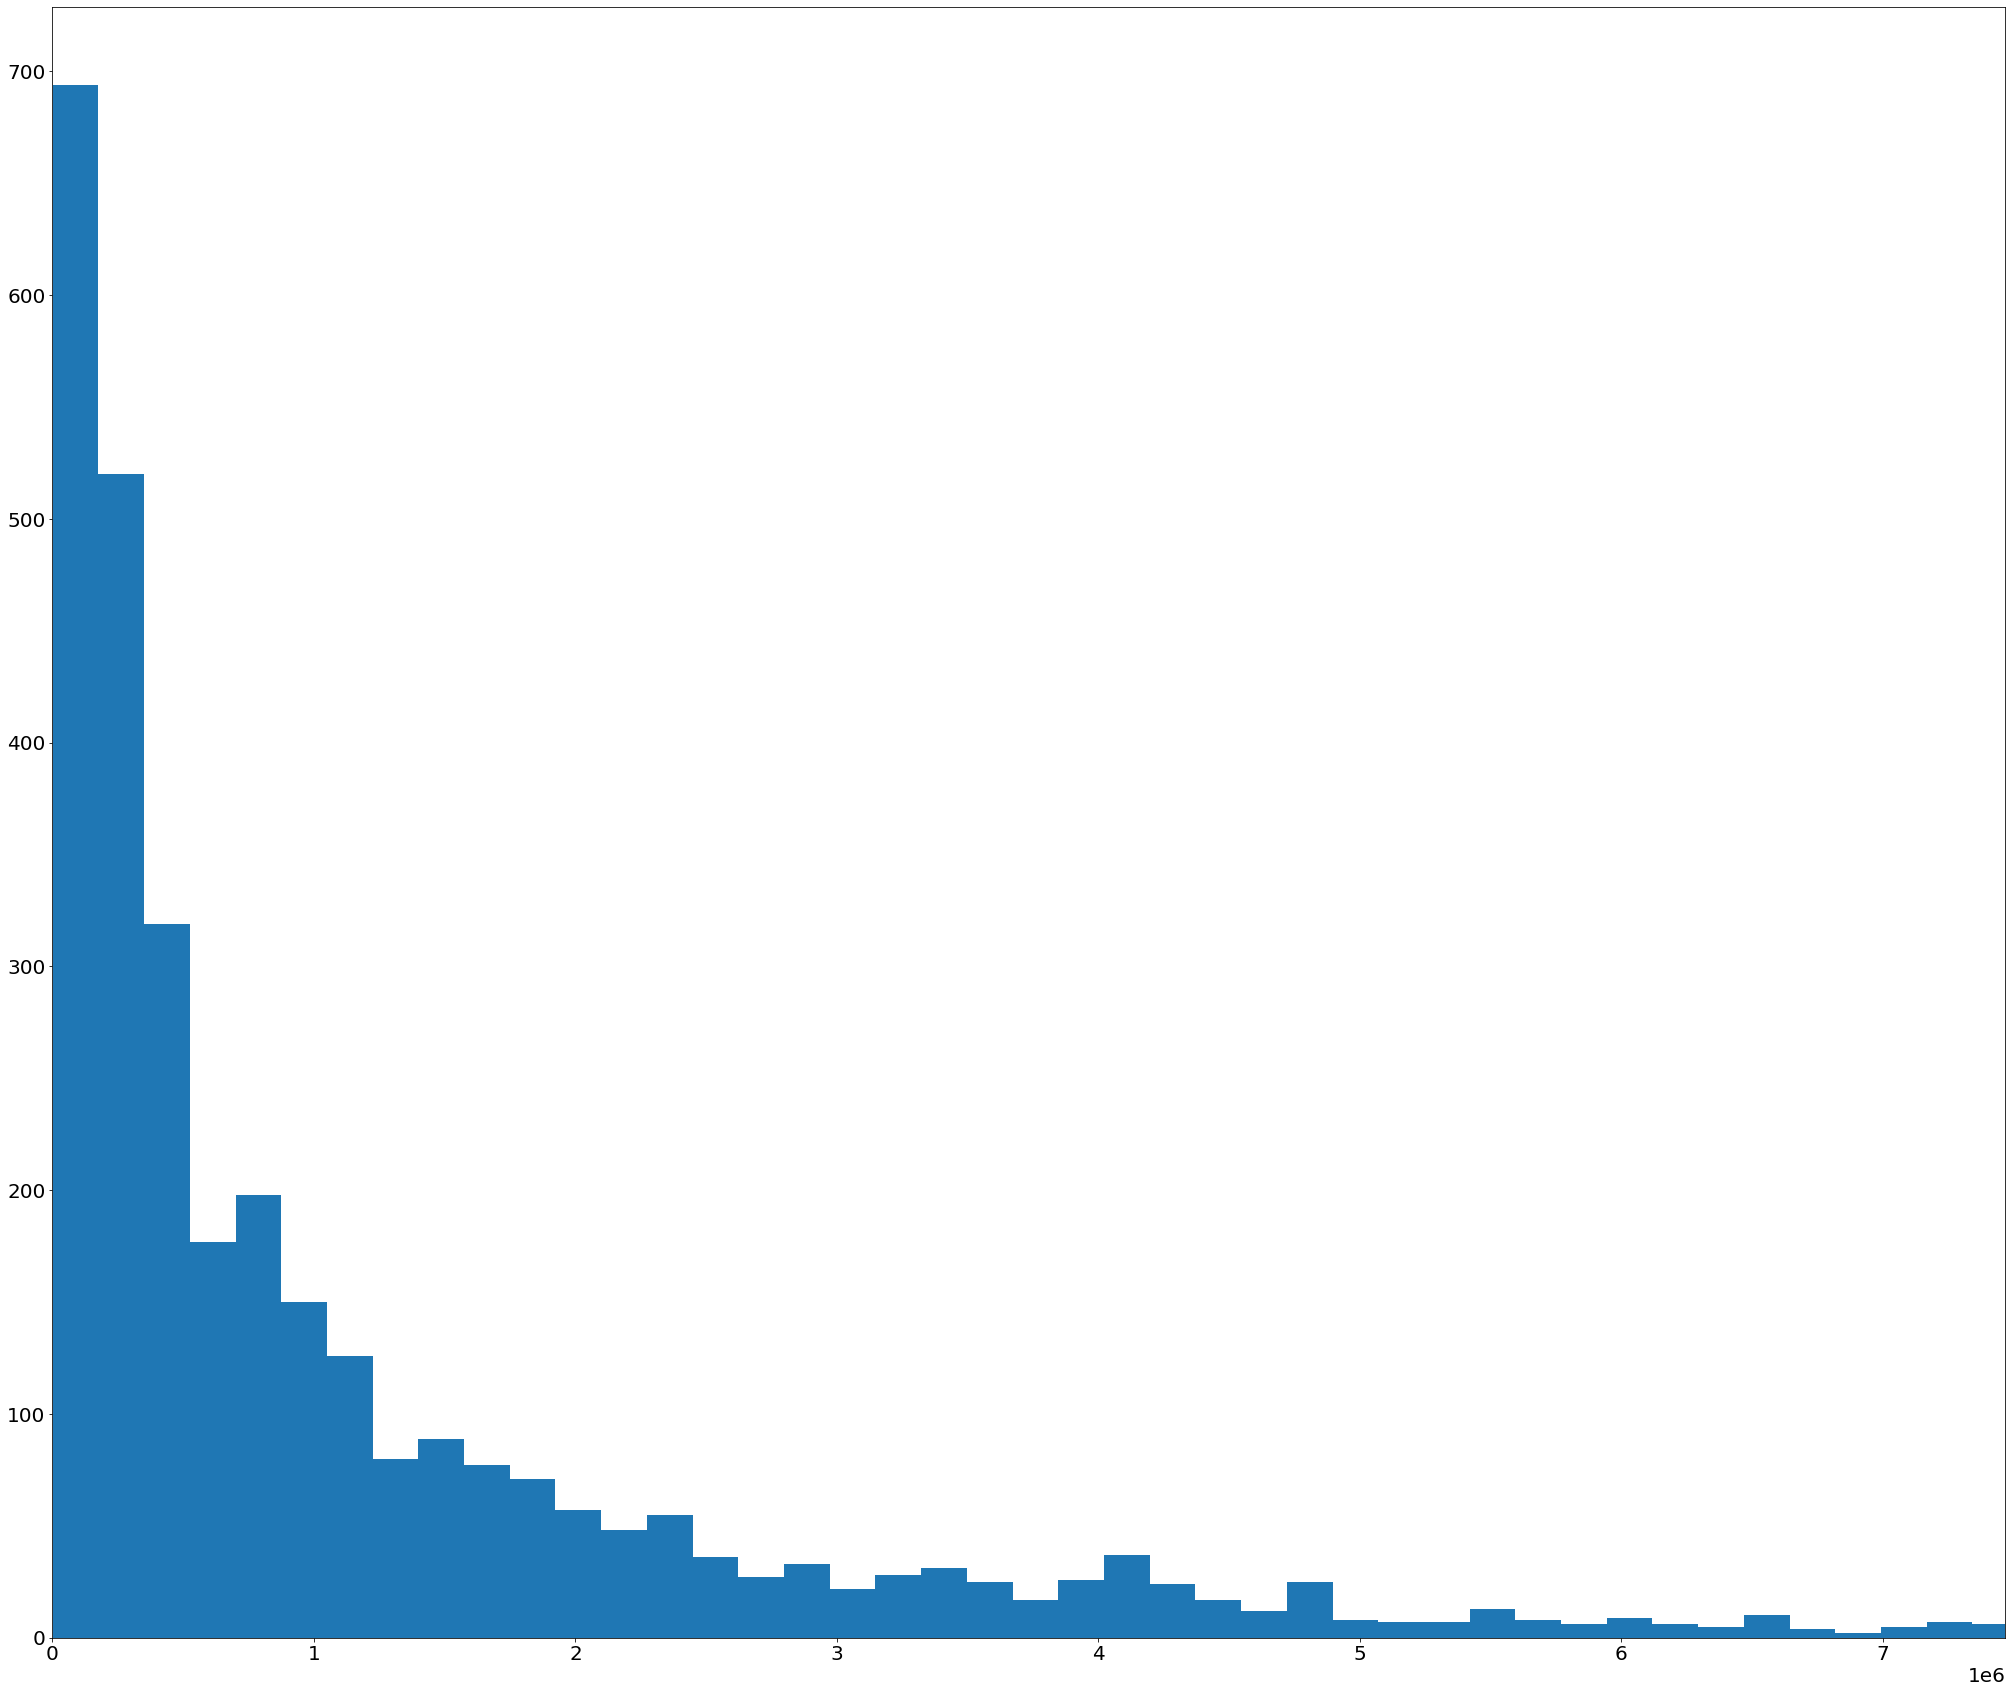

In [296]:
comedy_views=[]

for i in comedy_indice:
    comedy_views.append(df.views.iloc[i])

plt.hist(thinkstats2.Pmf(comedy_views), bins=(int(len(comedy_views)/10)))
plt.xlim(0,int(max(drama_views)/20))
plt.show()

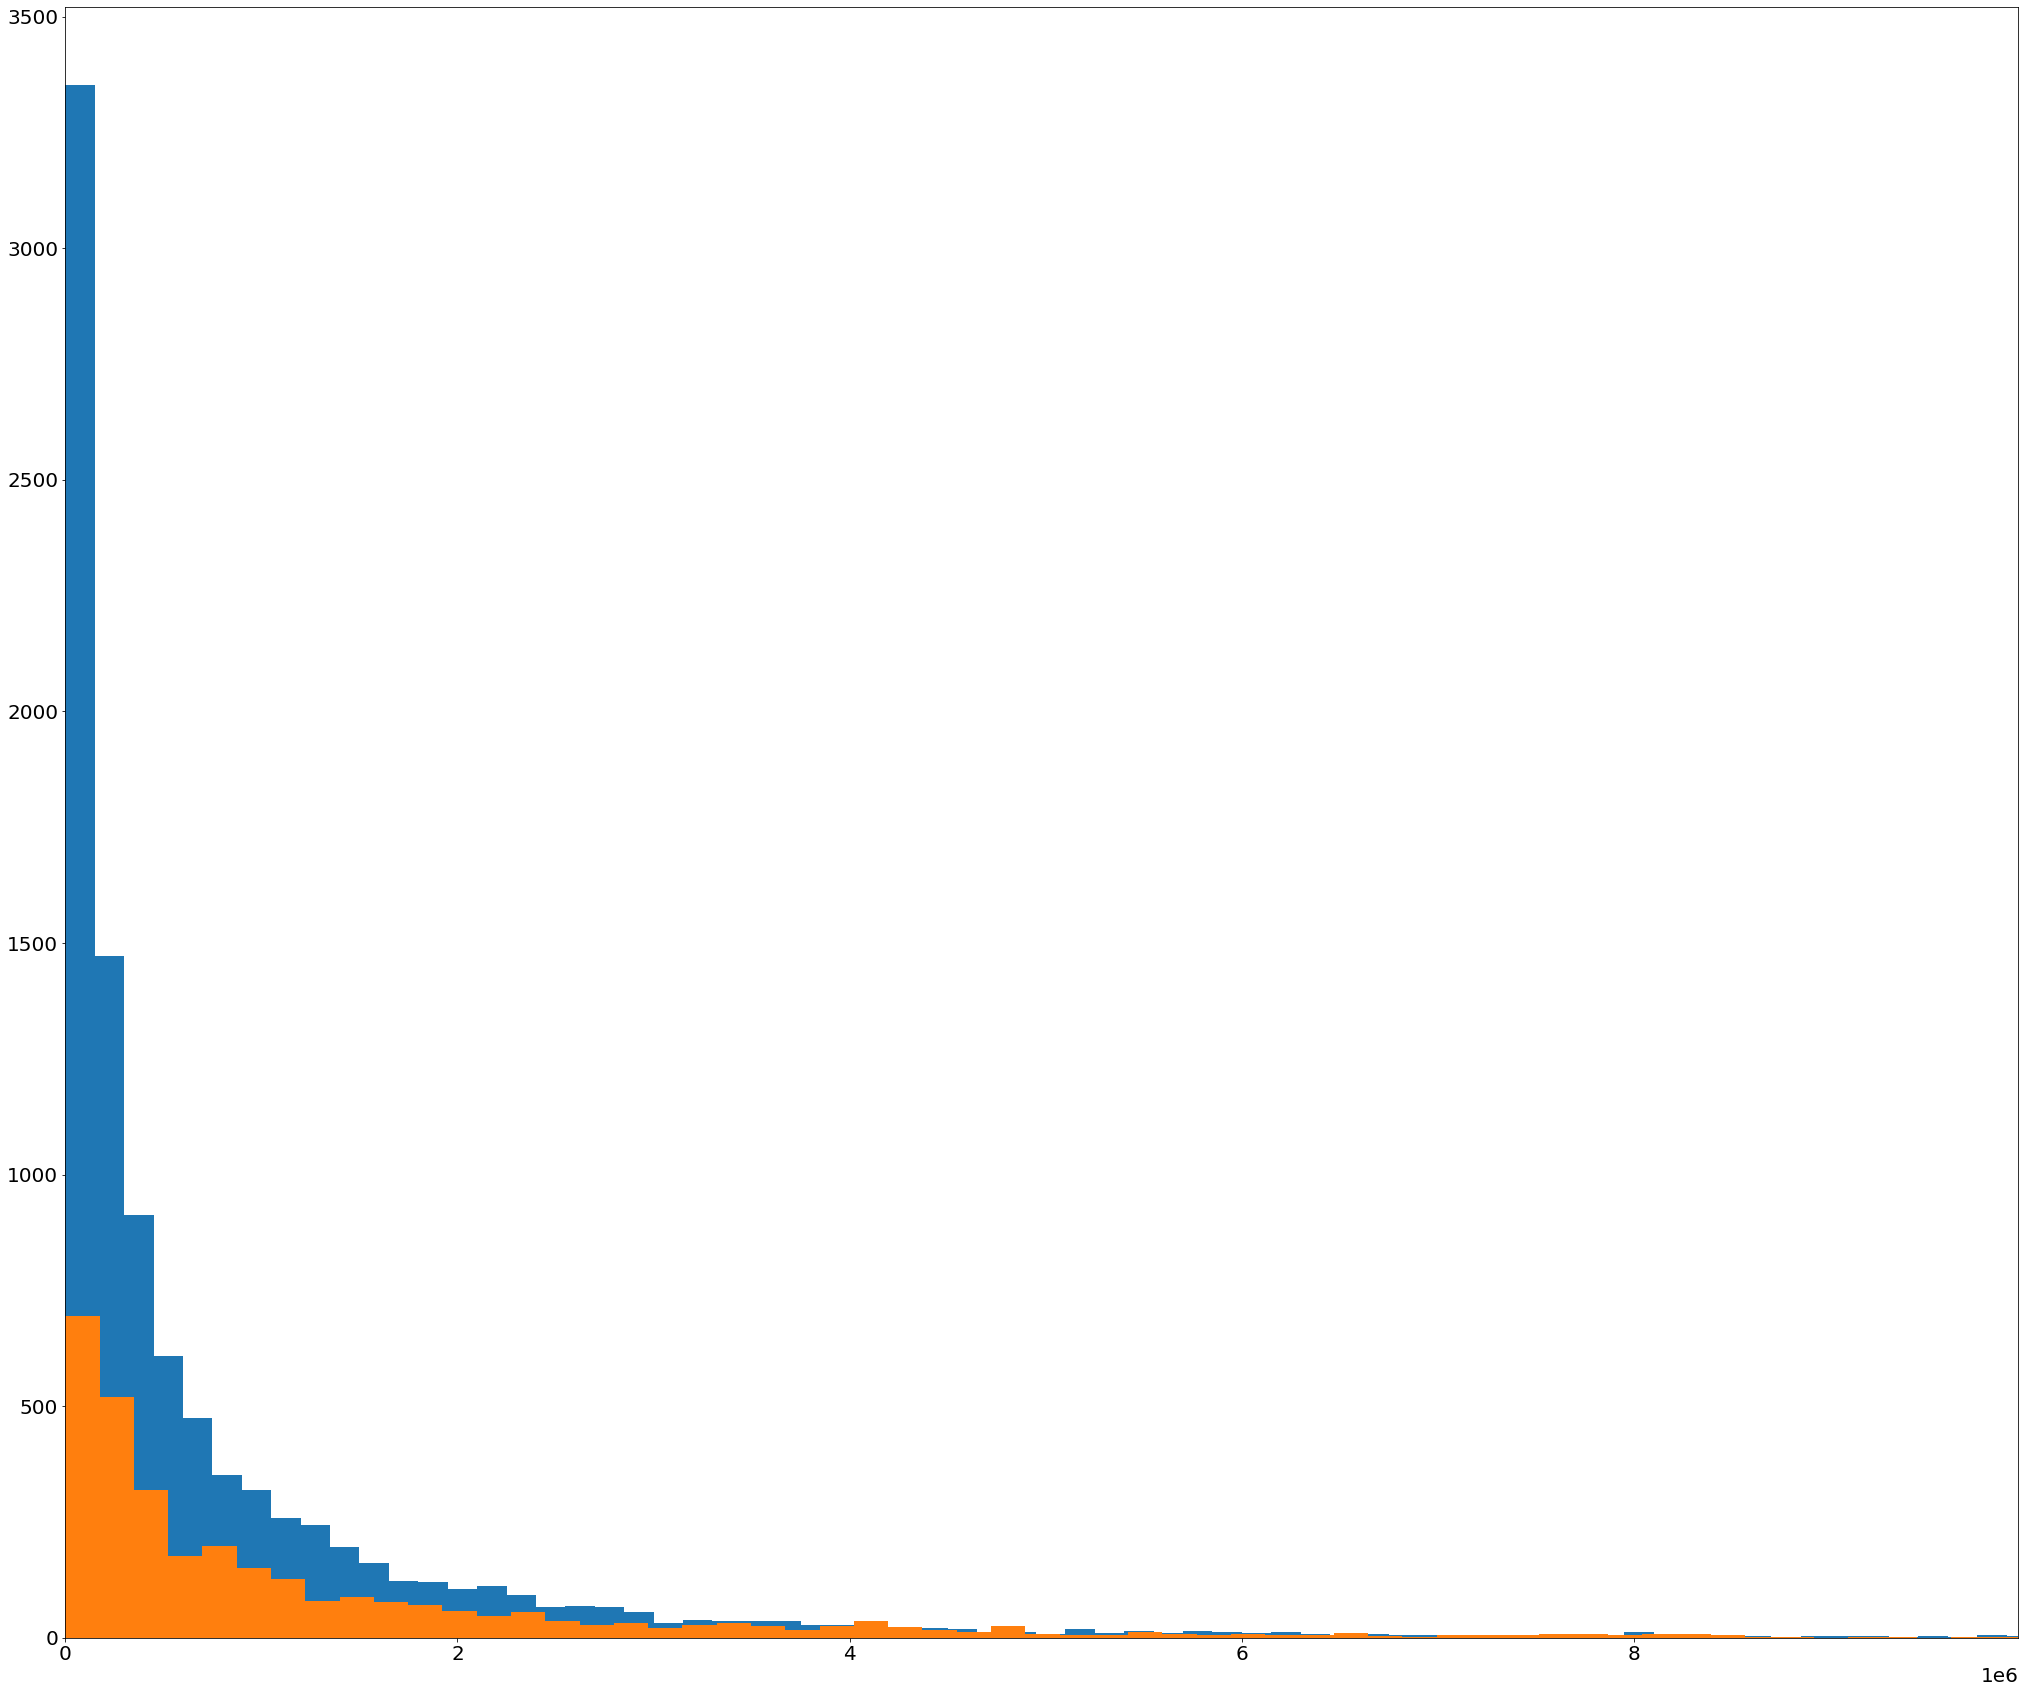

In [297]:
# Showing both plots side by side
plt.hist(thinkstats2.Pmf(drama_views),bins=(int(len(drama_views)/10)))
plt.hist(thinkstats2.Pmf(comedy_views), bins=(int(len(comedy_views)/10)))
plt.xlim(0,int(max(drama_views)/15))
plt.show()

The CDF (Cumulative Distribution Function) shows how each observation (number of views) from the data add up to the totality.

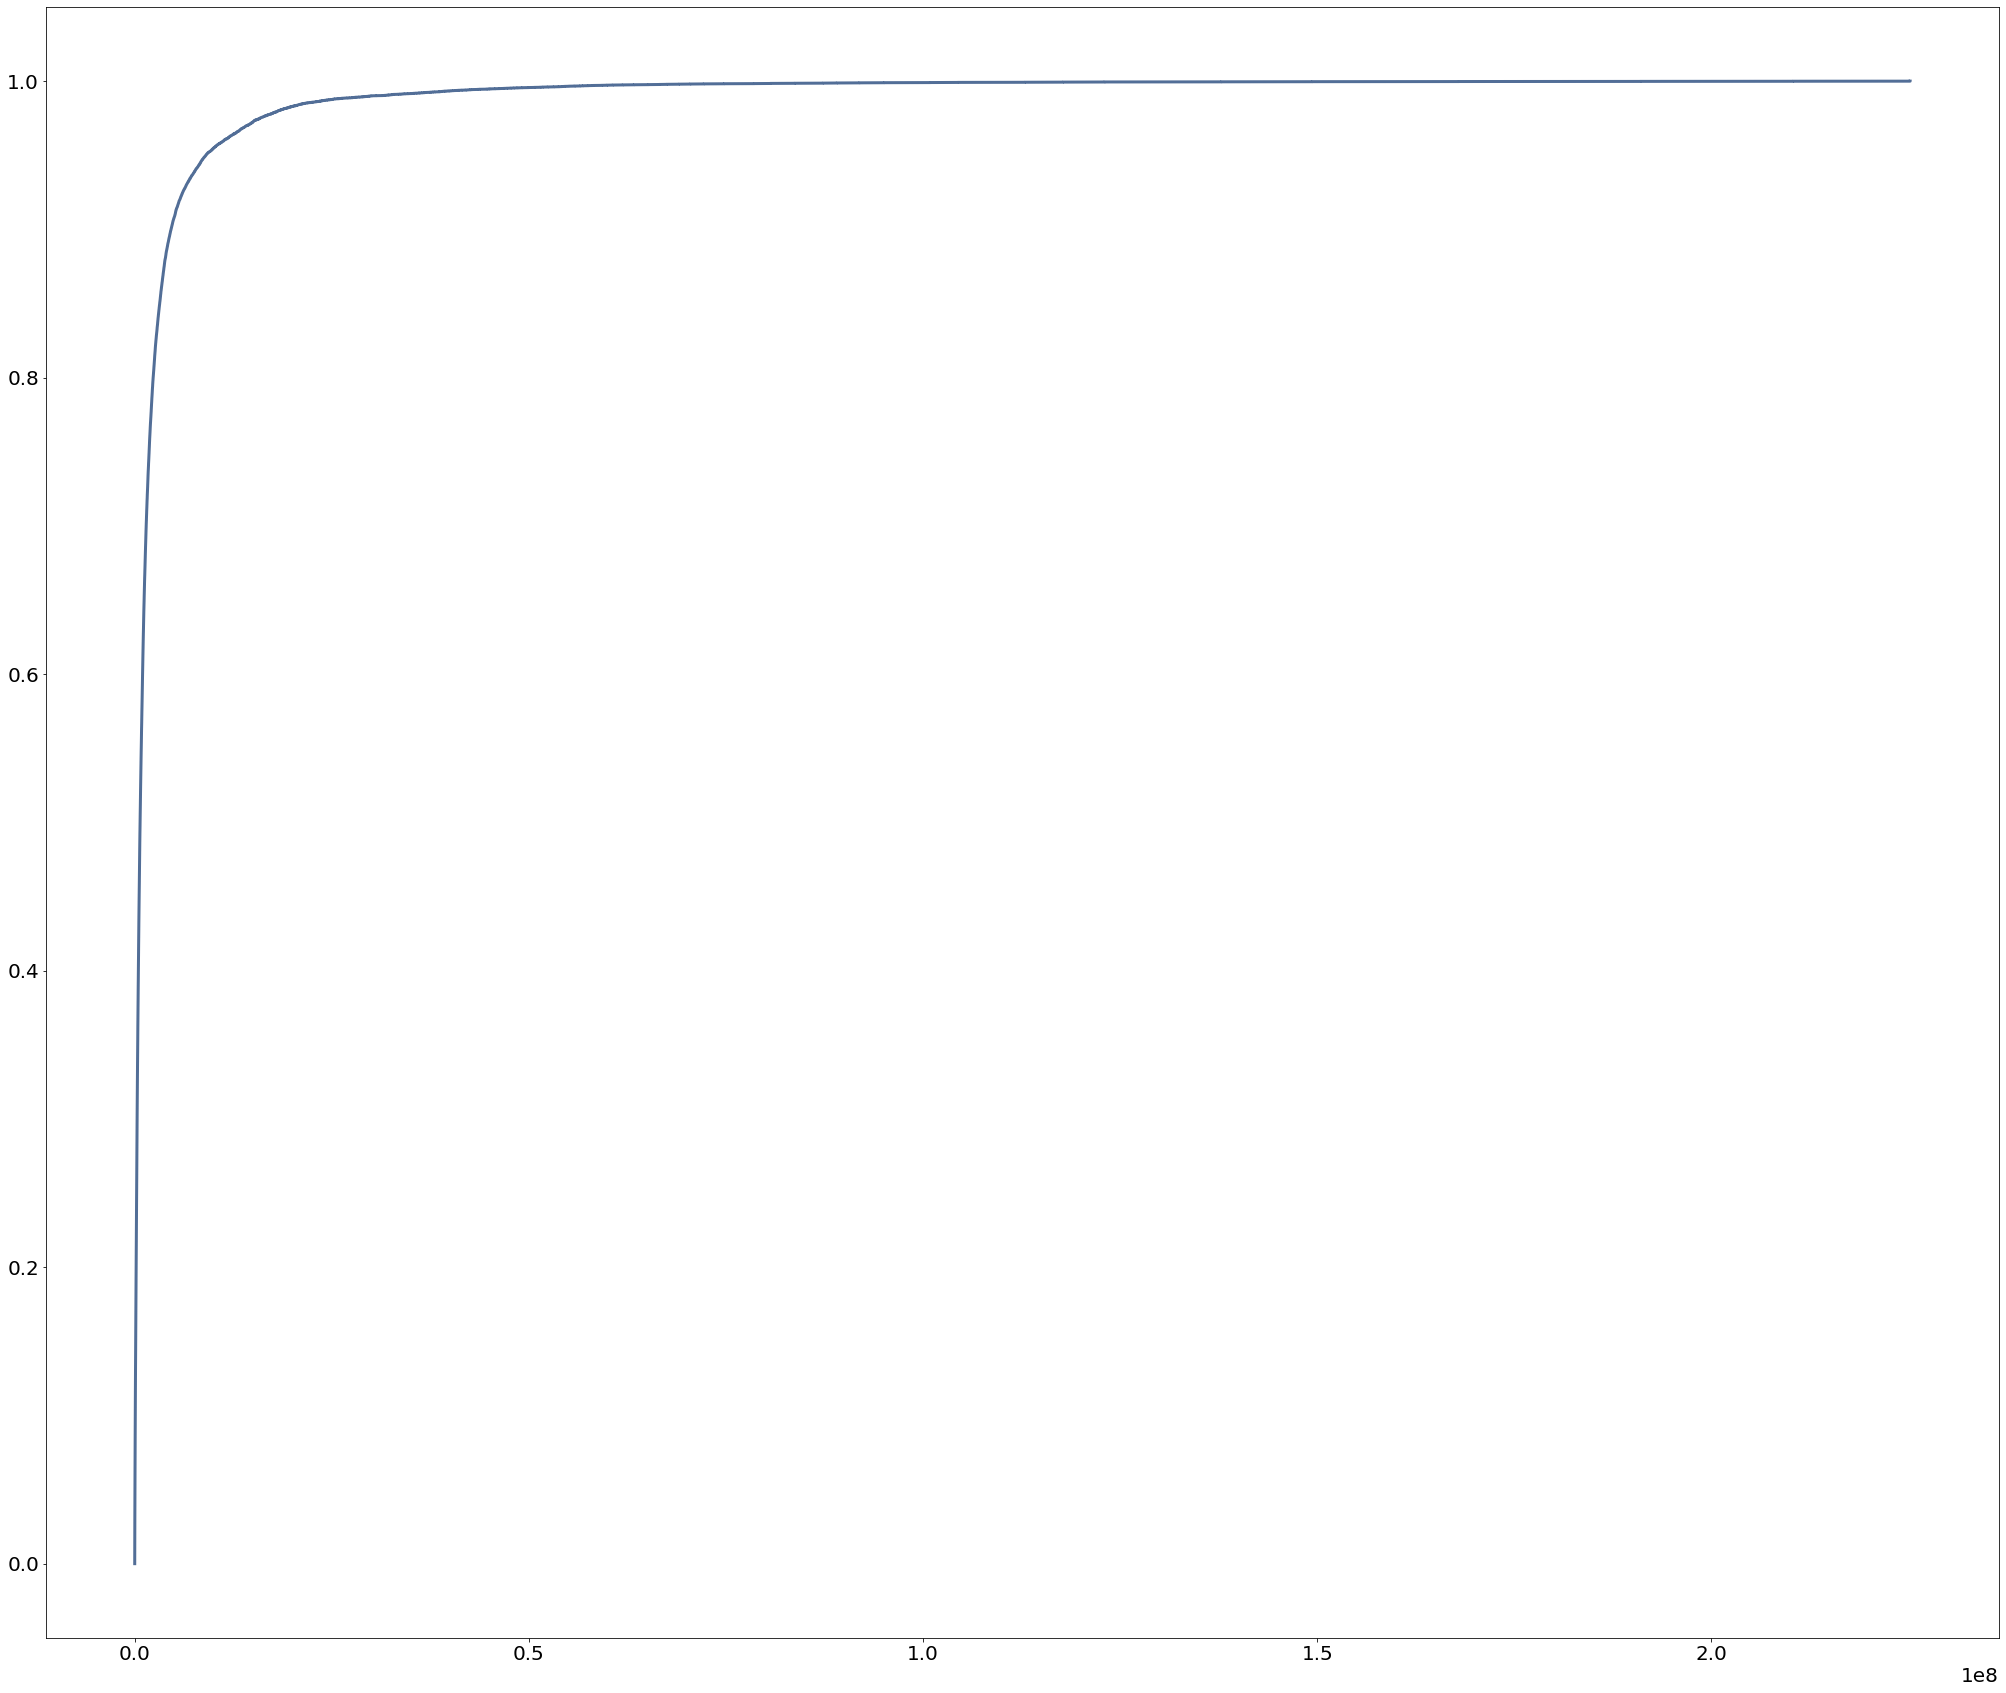

In [298]:
thinkplot.Cdf(thinkstats2.Cdf(df.views))
plt.show()

After ransforming this plot with the log-X and log-Y scale, we can observe a relative straight line (for a few X values) after X = e7. This means the number of views relatively resemble a log-normal distribution. However, it is better described as a Pareto distribution.

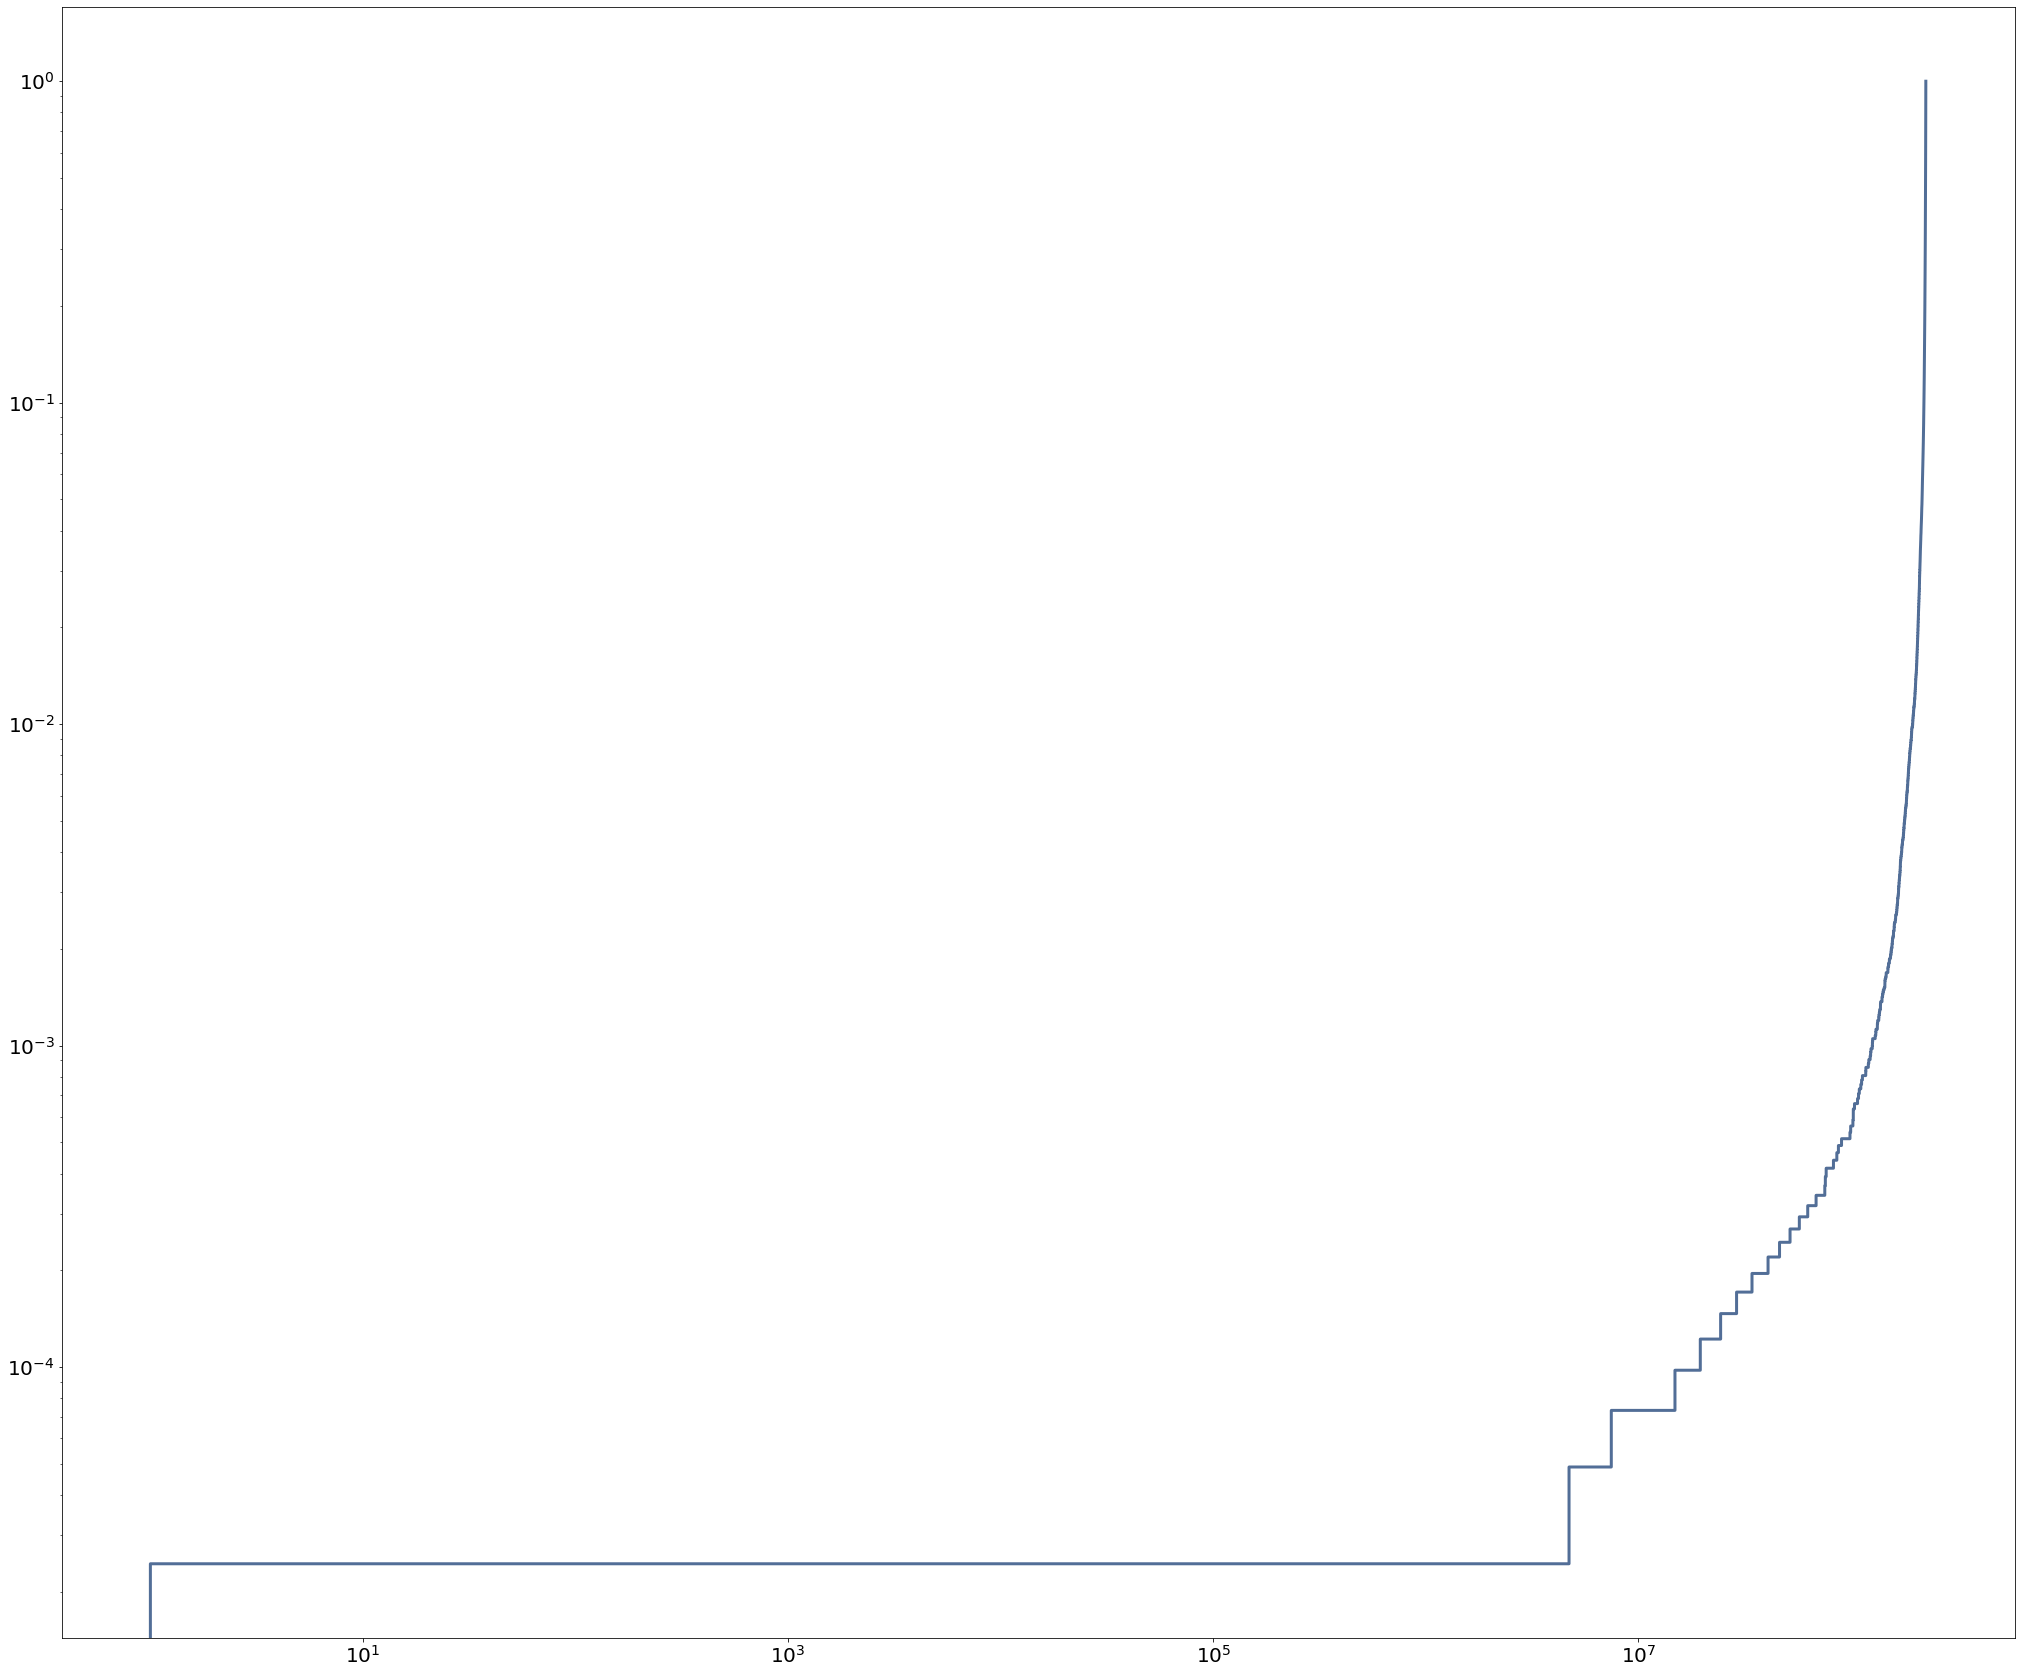

In [299]:
thinkplot.Cdf((thinkstats2.Cdf((1-df.views)+max(df.views))))
plt.xscale('log')
plt.yscale('log')
plt.show()

**********************************************************************************************************************

The final section explores two different pairs of variables, and contains both the scatter plots with a Line of Least Squares of the relationships as well as the correlational statistics between the pairs: Views v. Likes, Comments v. Likes.

In [300]:
# Calculating Line of Least Squares, whose slope shows the proportional value of the data.

from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    
    return fit_xs, fit_ys

The first pair is Views vs. Likes. The results show that for every view, there are around 0.026 likes.

Intercept: 12235.393535830968 
Slope: 0.026285735595105216


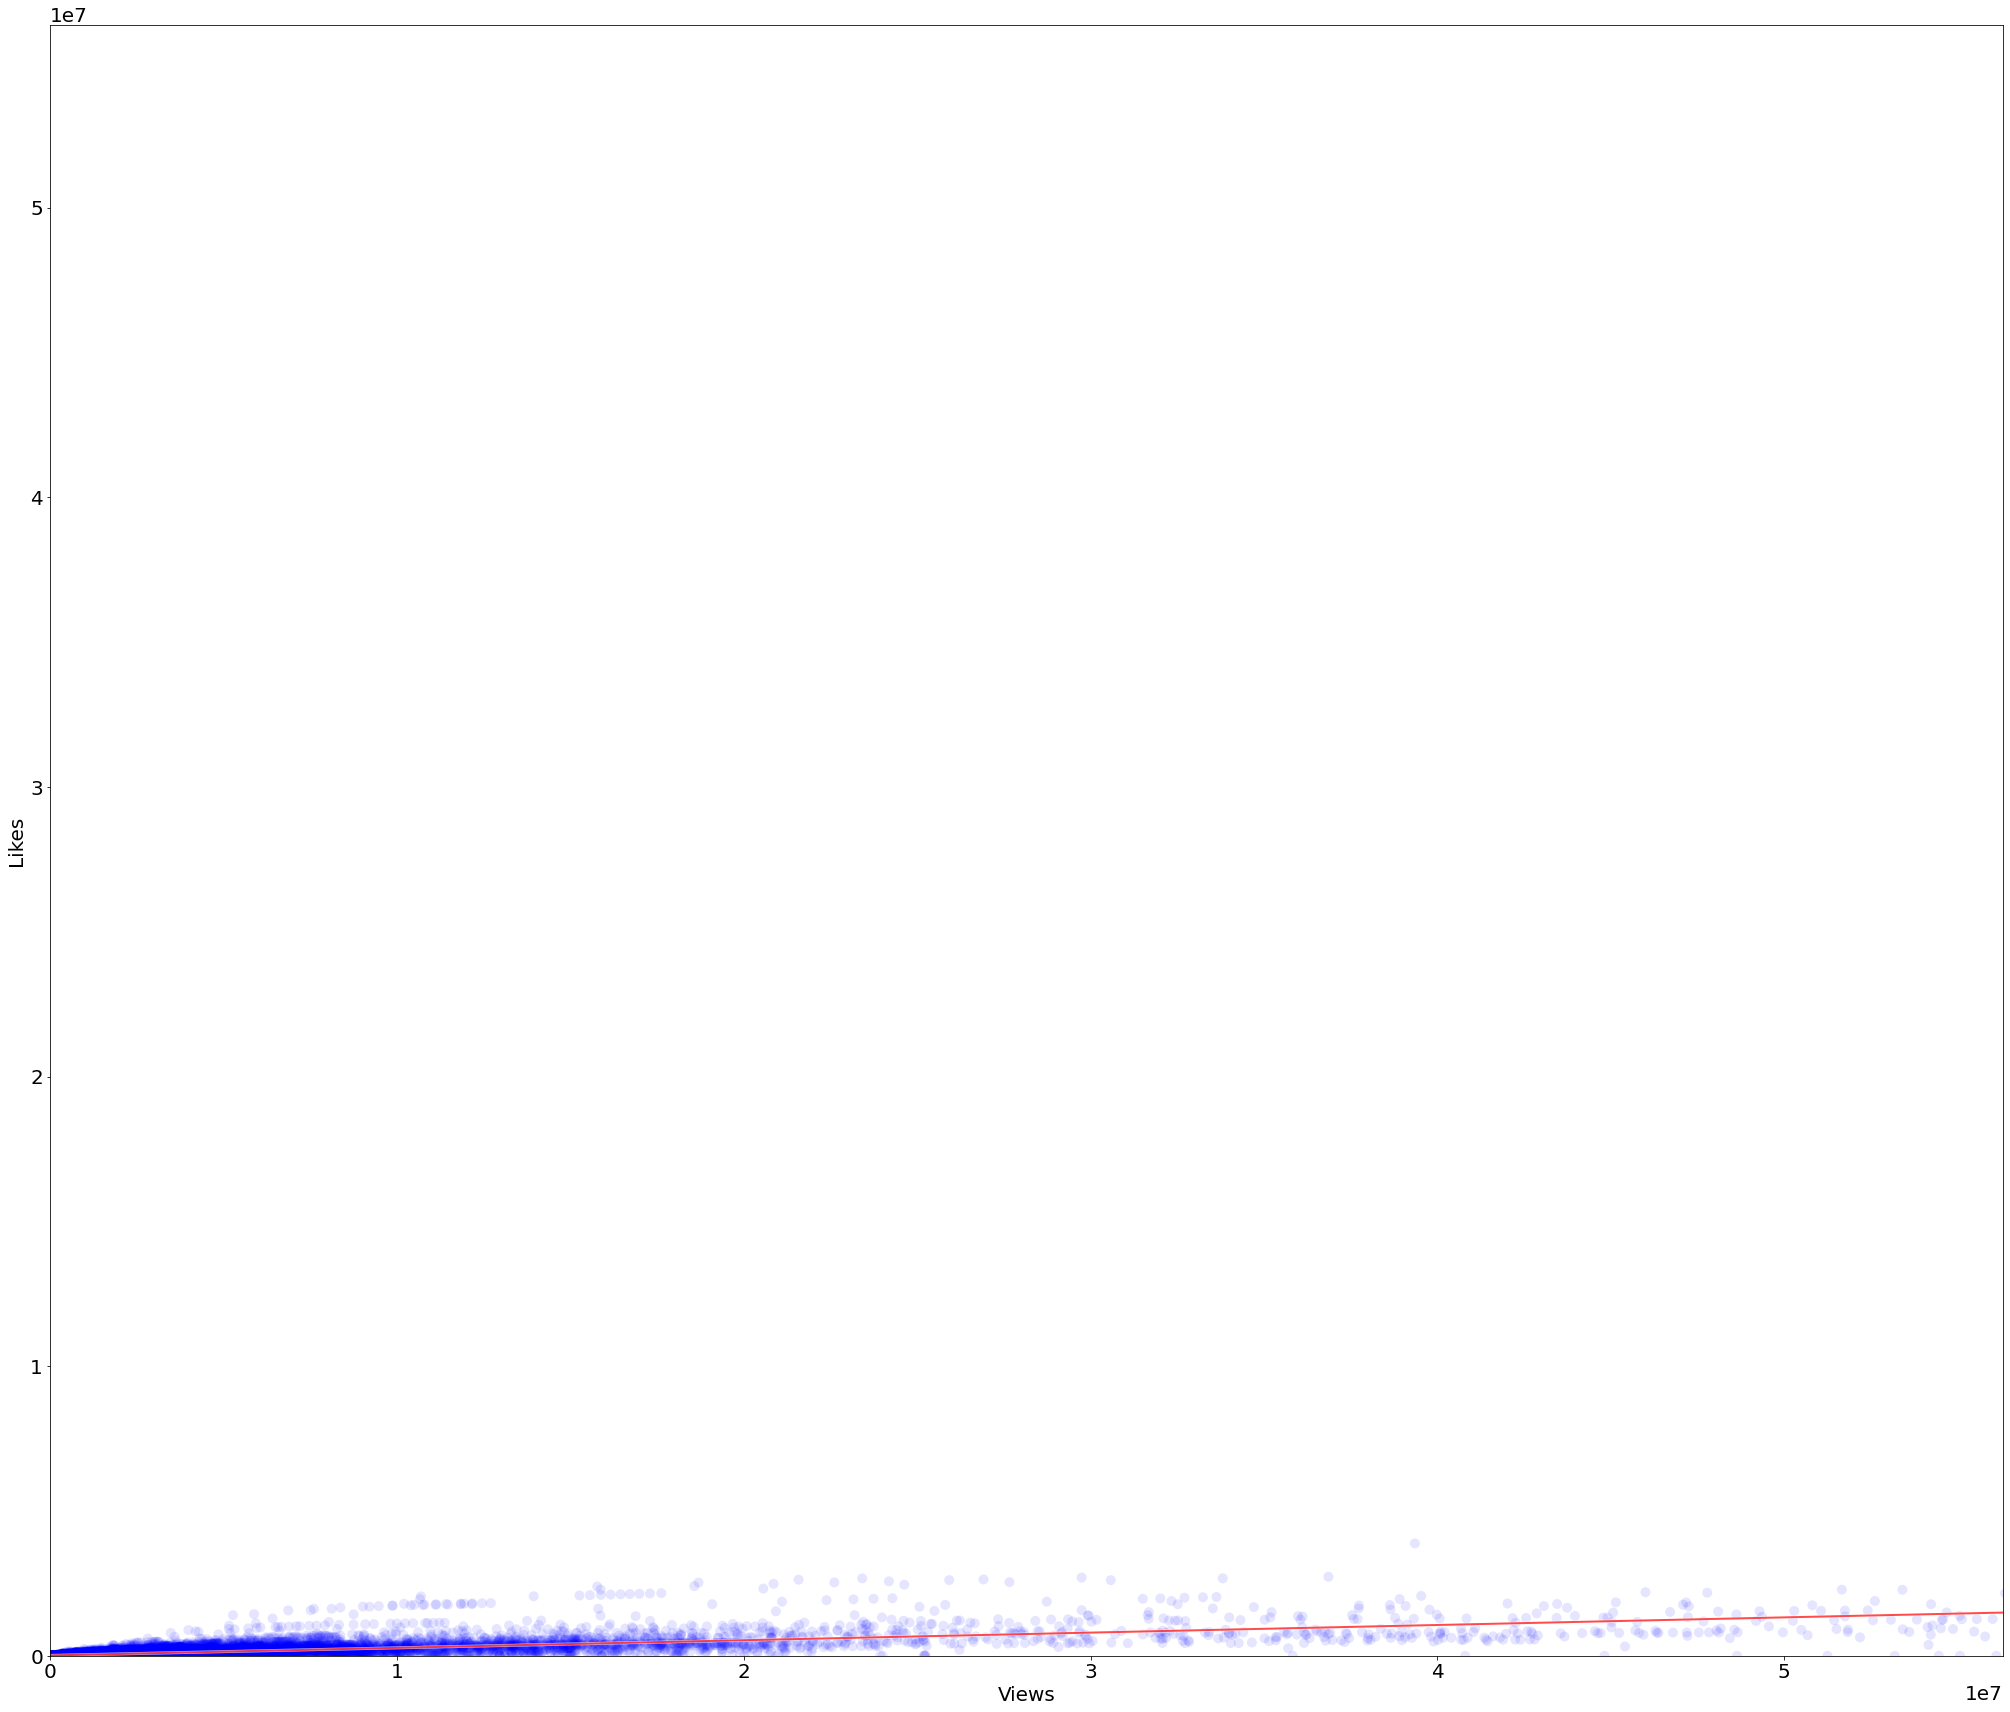

In [301]:
# Plotting views of the data.

inter, slope = LeastSquares(df.views, df.likes)
print("Intercept: {}".format(inter),
      "\nSlope: {}".format(slope))

fit_xs, fit_ys = FitLine(df.views, inter, slope)


thinkplot.Scatter(df.views, df.likes, color='blue', alpha=0.1, s=100)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
plt.xlim(0,int(max(df.views)/4))
plt.ylim(0,int(max(df.views)/4))
thinkplot.Config(xlabel="Views",
                 ylabel='Likes',
                 legend=False)

In [302]:
# Correlation Values
print("Pearson's Correlational Coefficients: {}".format(np.corrcoef(df.comment_count, df.likes)))
print("\nCovariance: {}".format(np.cov(df.comment_count, df.likes)))
print("\nSpearman's Rank Correlation: {}".format(scipy.stats.spearmanr(df.comment_count, df.likes)[0]))

Pearson's Correlational Coefficients: [[1.         0.80304767]
 [0.80304767 1.        ]]

Covariance: [[1.40292987e+09 6.88908368e+09]
 [6.88908368e+09 5.24571032e+10]]

Spearman's Rank Correlation: 0.8785332196484573


The second variable pair is Comments v. Likes. For every comment the videos receive, there are around 4.9 likes.

Intercept: 32819.34478605362 
Slope: 4.910497555518215


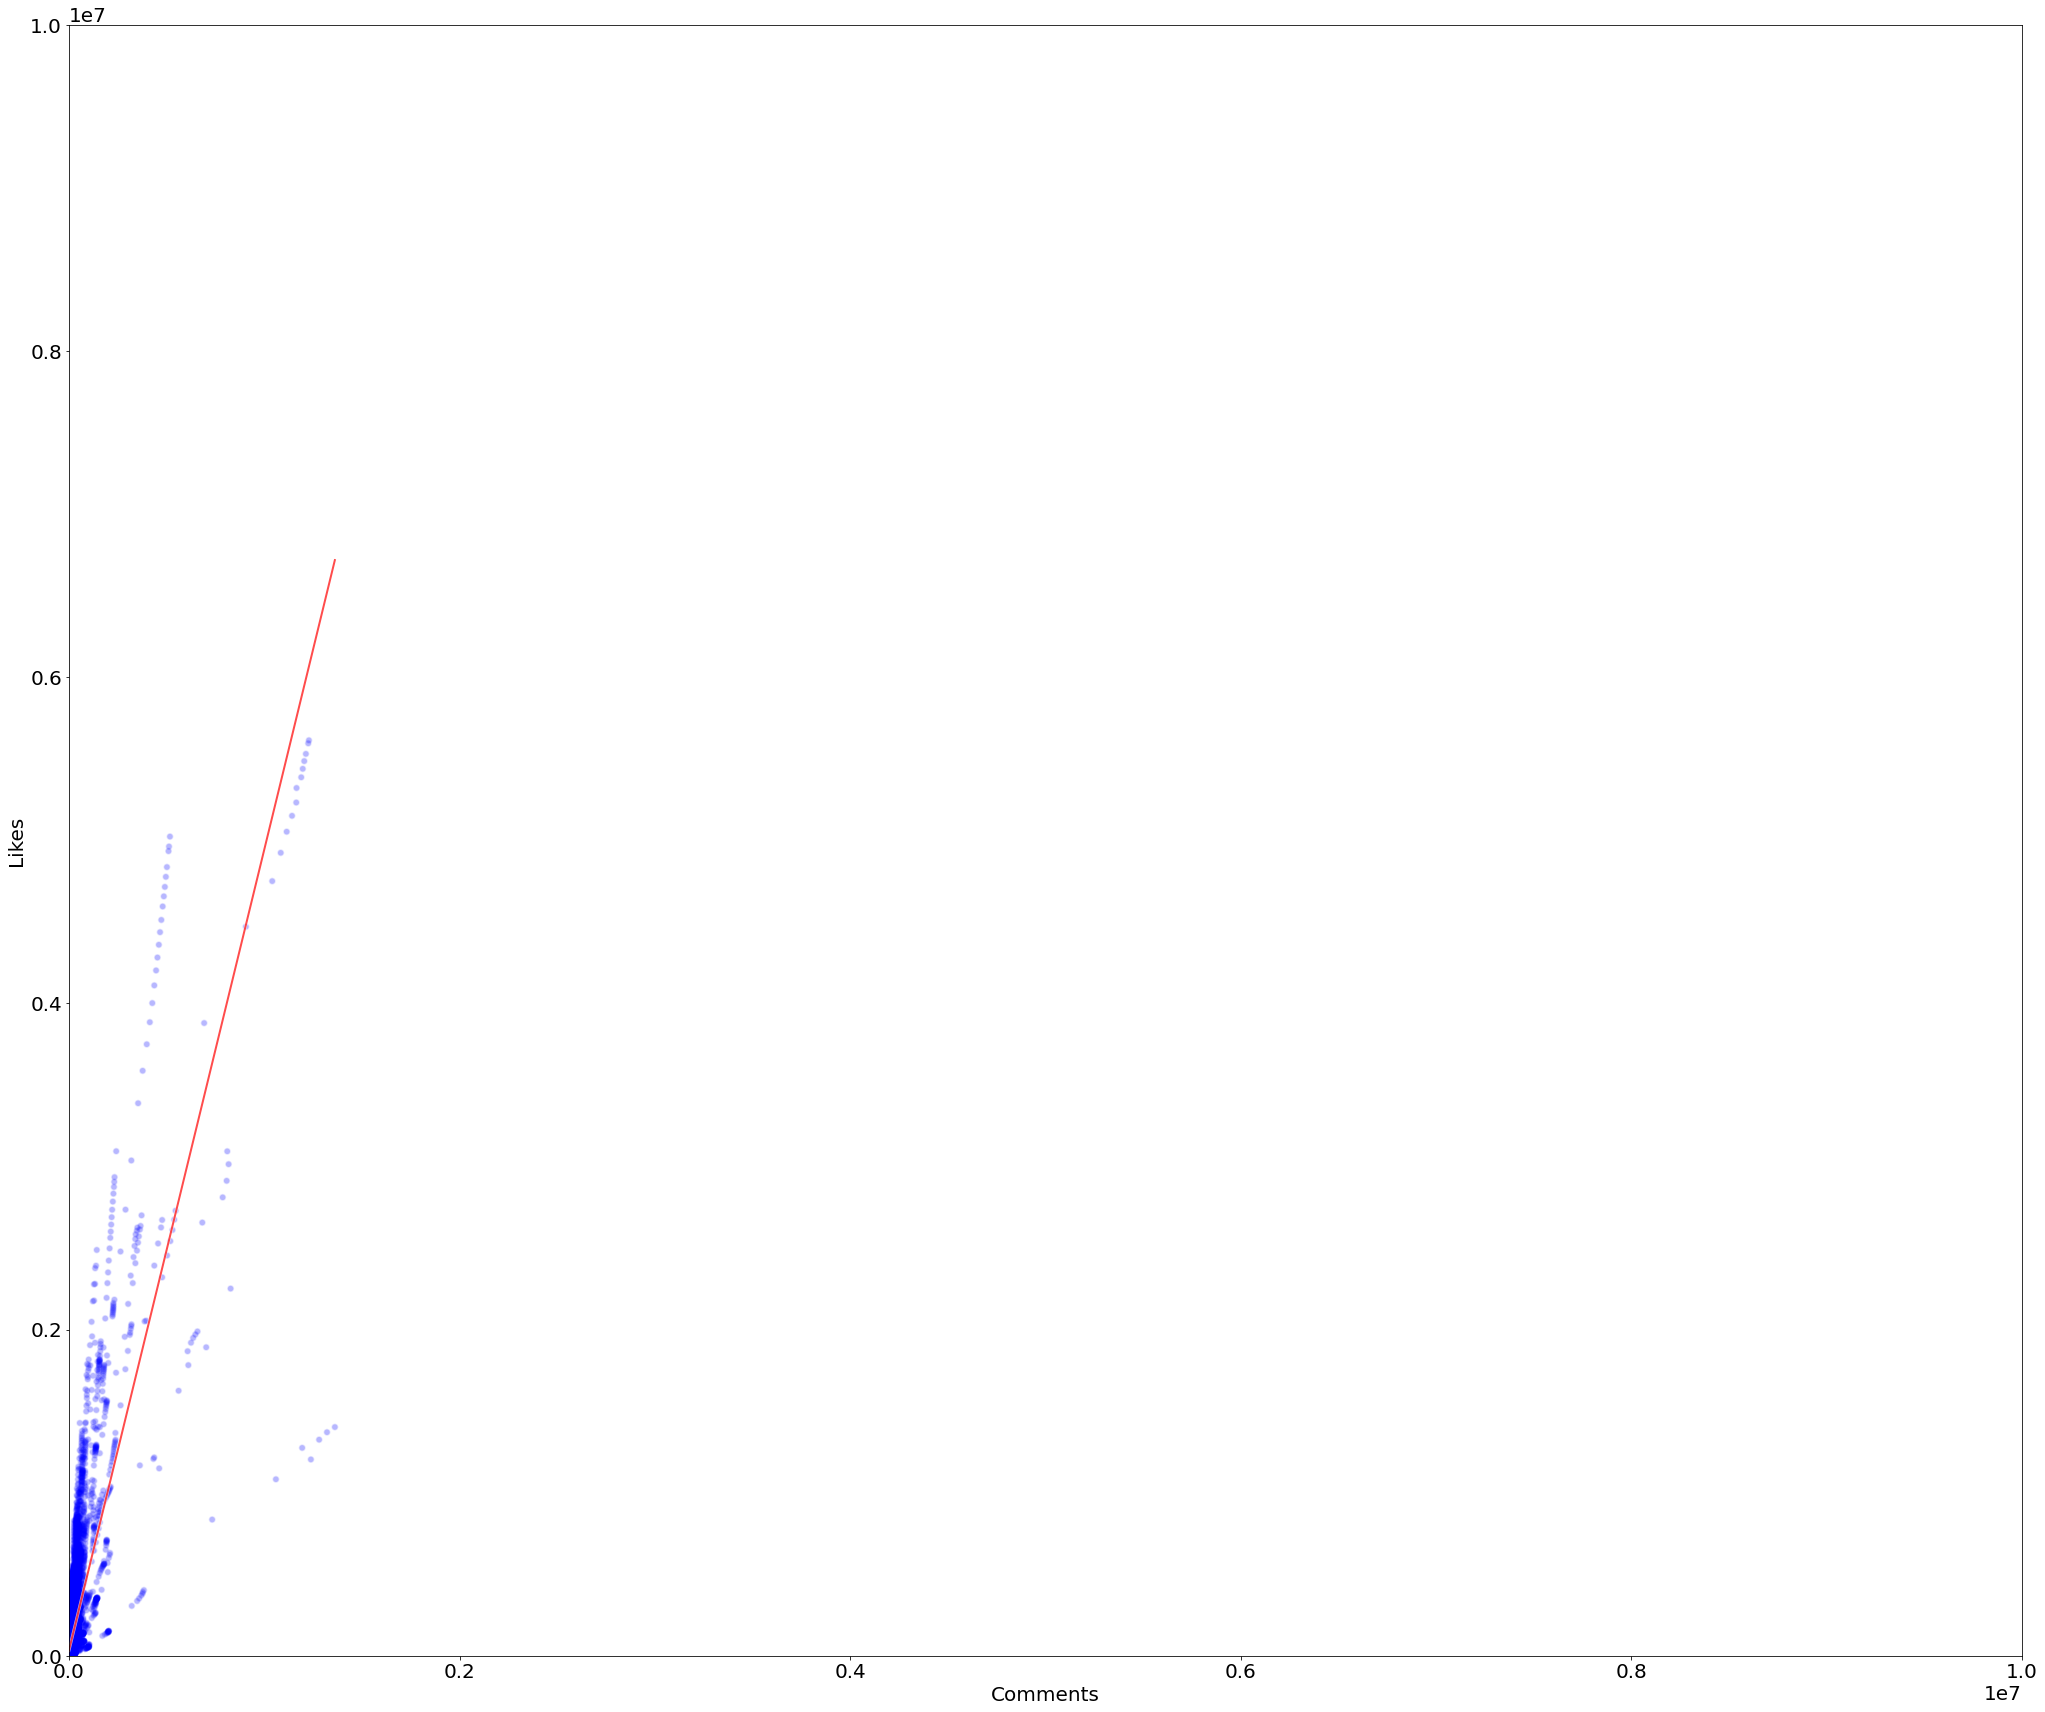

In [303]:
# Plotting comments of the data.

inter, slope = LeastSquares(df.comment_count, df.likes)
print("Intercept: {}".format(inter),
      "\nSlope: {}".format(slope))

fit_xs, fit_ys = FitLine(df.comment_count, inter, slope)


thinkplot.Scatter(df.comment_count, df.likes, color='blue', alpha=0.1, s=50)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Scatter(df.comment_count, df.likes)
plt.xlim(0,int(max(df.comment_count)))
plt.ylim(0,int(max(df.comment_count)))
thinkplot.Config(xlabel="Comments",
                 ylabel='Likes',
                 axis=[0, 1e7, 0, 1e7],
                 legend=False)

In [304]:
print("Pearson's Correlational Coefficients: {}".format(np.corrcoef(df.views, df.likes)))
print("\nCovariance: {}".format(np.cov(df.views, df.likes)))
print("\nSpearman's Rank Correlation: {}".format(scipy.stats.spearmanr(df.views, df.likes)[0]))

Pearson's Correlational Coefficients: [[1.        0.8491676]
 [0.8491676 1.       ]]

Covariance: [[5.47458079e+13 1.43903383e+12]
 [1.43903383e+12 5.24571032e+10]]

Spearman's Rank Correlation: 0.8625020326507264


This relationship is more linear than the first, however, Spearman's r returns a higher correlation than Pearson's again.

I also made a third relationship analysis between category of the videos and their views.

I've included a Null Hypothesis Test for the correlation. Both the p-values are less than 0.0, so proving the Null Hypothesis false.

In [305]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [306]:
# Views v. Likes Null Hypothesis
data = df.views.values, df.likes.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

The Null hypothesis is false.

In [307]:
# Comments v. Likes Null Hypothesis
data = df.comment_count.values, df.likes.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

The Null hypothesis is false.

Conclusions:

The project analyzed 5 variables for around 41,000 videos and the correlations between them. The project uses fundamental data science skills, such as data cleaning, data analyzation, data visualization and project presentation.


Bibliography:

Downey, Allen. Think Stats 2. Github: https://github.com/AllenDowney/ThinkStats2